In [1]:
import pertpy as pt
import scanpy as sc
import numpy as np

import random
import torch
import sklearn
import os
def set_seed(seed: int):
    # Set Python random seed
    random.seed(seed)

    # Set NumPy random seed
    np.random.seed(seed)

    # Set PyTorch random seed
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # If using multi-GPU.

        # Ensure deterministic behavior in PyTorch (can slow down computations)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    # Set sklearn random seed
    sklearn.utils.check_random_state(seed)

    # Set environment variable for reproducibility
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(123)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWar

In [2]:
'''
adata=pt.dt.papalexi_2021()
print(adata)
adata=adata["rna"]
for i in adata.obs.columns[1:]:
    if not isinstance(adata.obs[i][0] , str):
        continue
    uniquei=np.unique(adata.obs[i])
    if len(uniquei)<=30:
        print(i,uniquei)

print(adata.X[:10,:10])

import scanpy as sc
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var["highly_variable"]]
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)
adata.write("../data/ECCITE.h5ad")
'''

'\nadata=pt.dt.papalexi_2021()\nprint(adata)\nadata=adata["rna"]\nfor i in adata.obs.columns[1:]:\n    if not isinstance(adata.obs[i][0] , str):\n        continue\n    uniquei=np.unique(adata.obs[i])\n    if len(uniquei)<=30:\n        print(i,uniquei)\n\nprint(adata.X[:10,:10])\n\nimport scanpy as sc\nsc.pp.filter_cells(adata, min_genes=100)\nsc.pp.filter_genes(adata, min_cells=3)\nsc.pp.normalize_total(adata, target_sum=1e4)\nsc.pp.log1p(adata)\nsc.pp.highly_variable_genes(adata, n_top_genes=2000)\nadata = adata[:, adata.var["highly_variable"]]\nsc.tl.pca(adata, svd_solver="arpack")\nsc.pp.neighbors(adata)\nsc.tl.umap(adata)\nadata.write("../data/ECCITE.h5ad")\n'

AnnData object with n_obs × n_vars = 20729 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'NT', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase', 'n_genes'
    var: 'name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'HTO_classification_colors', 'MULTI_ID_colors', 'Phase_colors', 'gene_target_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'perturbation_colors', 'replicate_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


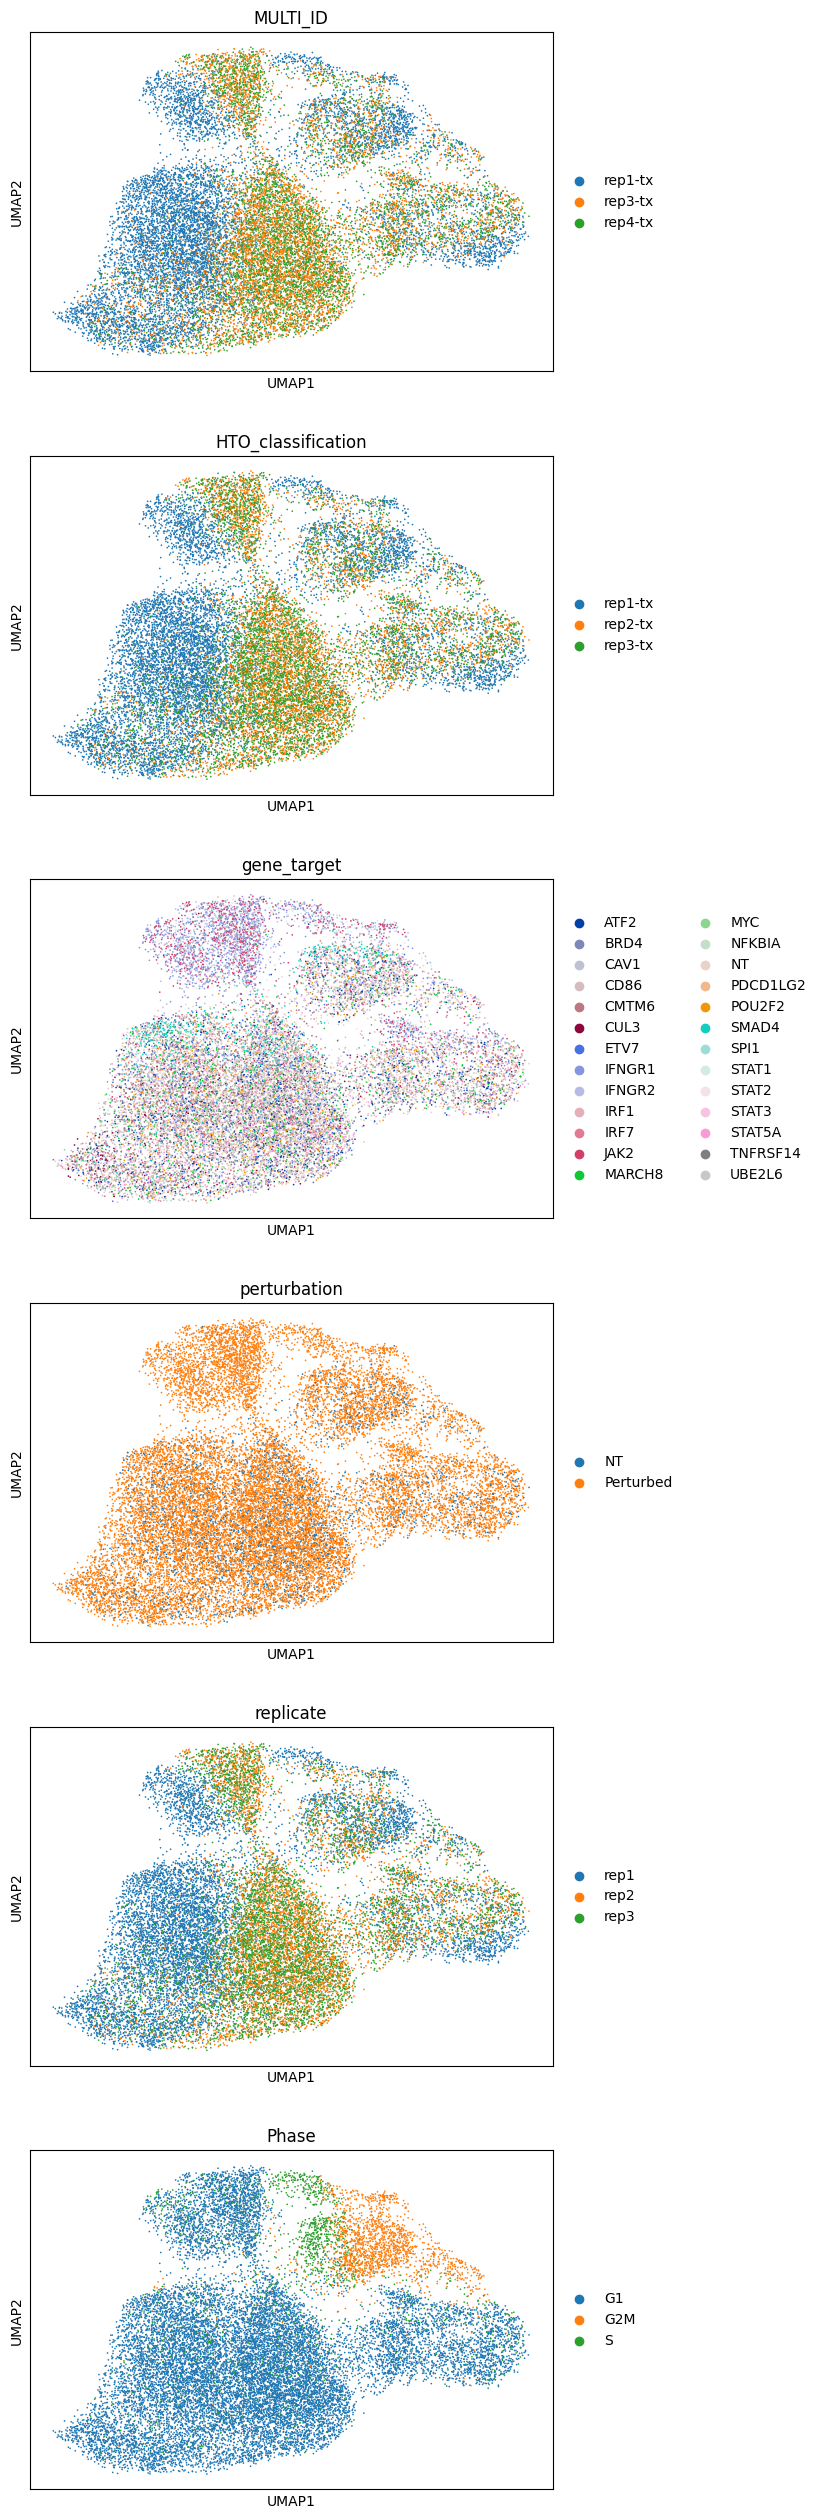

In [3]:
adata=sc.read_h5ad("../data/ECCITE.h5ad")
print(adata)
sc.pl.umap(adata,color=["MULTI_ID","HTO_classification","gene_target","perturbation","replicate","Phase"],ncols=1)

In [4]:
for i in adata.obs.columns[1:]:
    if not isinstance(adata.obs[i][0] , str):
        continue
    uniquei=np.unique(adata.obs[i])
    if len(uniquei)<=30:
        print(i,uniquei)

print(adata.X[:10,:10])

MULTI_ID ['rep1-tx' 'rep3-tx' 'rep4-tx']
HTO_classification ['rep1-tx' 'rep2-tx' 'rep3-tx']
gene_target ['ATF2' 'BRD4' 'CAV1' 'CD86' 'CMTM6' 'CUL3' 'ETV7' 'IFNGR1' 'IFNGR2'
 'IRF1' 'IRF7' 'JAK2' 'MARCH8' 'MYC' 'NFKBIA' 'NT' 'PDCD1LG2' 'POU2F2'
 'SMAD4' 'SPI1' 'STAT1' 'STAT2' 'STAT3' 'STAT5A' 'TNFRSF14' 'UBE2L6']
perturbation ['NT' 'Perturbed']
replicate ['rep1' 'rep2' 'rep3']
Phase ['G1' 'G2M' 'S']
  (6, 1)	0.5947323441505432
  (0, 2)	0.45817938446998596
  (3, 2)	1.0809301137924194
  (4, 2)	2.1085922718048096
  (5, 2)	2.20072865486145
  (6, 2)	2.117809772491455
  (7, 2)	1.5791527032852173
  (8, 2)	2.4346671104431152
  (9, 2)	2.2123894691467285
  (9, 8)	0.7017057538032532


In [5]:
from ndreamer import NDreamer

model = NDreamer(adata, condition_key='gene_target', contorl_name='NT', num_hvg=2000, require_batch=True,
                            batch_key='replicate',
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=10, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./ECCITE/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./ECCITE/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)

1
Start data preprocessing
Original adata.obs[replicate] back up to adata.obs['batch_backup']
Original adata.obs[gene_target] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'NT': 0, 'STAT2': 1, 'CAV1': 2, 'STAT1': 3, 'CD86': 4, 'IRF7': 5, 'ATF2': 6, 'STAT3': 7, 'JAK2': 8, 'NFKBIA': 9, 'SMAD4': 10, 'STAT5A': 11, 'CMTM6': 12, 'IFNGR1': 13, 'UBE2L6': 14, 'PDCD1LG2': 15, 'CUL3': 16, 'BRD4': 17, 'MARCH8': 18, 'IRF1': 19, 'POU2F2': 20, 'ETV7': 21, 'IFNGR2': 22, 'TNFRSF14': 23, 'SPI1': 24, 'MYC': 25}
Condition mapping to adata.obs['batch']: {'replicate': {'rep1': 0, 'rep3': 1, 'rep2': 2}}
Unique batch mapping: {'rep1': 0, 'rep3': 1, 'rep2': 2}
Calculating the clusters
Unique groups: ['0_ATF2' '0_BRD4' '0_CAV1' '0_CD86' '0_CMTM6' '0_CUL3' '0_ETV7'
 '0_IFNGR1' '0_IFNGR2' '0_IRF1' '0_IRF7' '0_JAK2' '0_MARCH8' '0_MYC'
 '0_NFKBIA' '0_NT' '0_PDCD1LG2' '0_POU2F2' '0_SMAD4' '0_SPI1' '0_STAT1'
 '0_STAT2' '0_STAT3' '0_STAT5A' '0_TNFRSF14' '0_UBE2L6' '1_ATF2' '1_B

Finished clustering
Data preprocessing done
Remaining number of cells: 20729
Require batch: True
Batch name to number mapping (may be used for search for saved adata):
 {'replicate': {'rep1': 0, 'rep3': 1, 'rep2': 2}}
Condition name to number mapping (may be used for search for saved adata):
 {'NT': 0, 'STAT2': 1, 'CAV1': 2, 'STAT1': 3, 'CD86': 4, 'IRF7': 5, 'ATF2': 6, 'STAT3': 7, 'JAK2': 8, 'NFKBIA': 9, 'SMAD4': 10, 'STAT5A': 11, 'CMTM6': 12, 'IFNGR1': 13, 'UBE2L6': 14, 'PDCD1LG2': 15, 'CUL3': 16, 'BRD4': 17, 'MARCH8': 18, 'IRF1': 19, 'POU2F2': 20, 'ETV7': 21, 'IFNGR2': 22, 'TNFRSF14': 23, 'SPI1': 24, 'MYC': 25}
Preprocessing time: 51.86441 seconds


Overall Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Resetting 703 unused embeddings.
Resetting 698 unused embeddings.
Resetting 714 unused embeddings.
Resetting 704 unused embeddings.


Resetting 719 unused embeddings.
Resetting 688 unused embeddings.
Resetting 693 unused embeddings.
Resetting 727 unused embeddings.


Resetting 690 unused embeddings.
Resetting 705 unused embeddings.
Resetting 666 unused embeddings.
Resetting 709 unused embeddings.


Resetting 660 unused embeddings.
Resetting 652 unused embeddings.
Resetting 704 unused embeddings.
Resetting 673 unused embeddings.


Resetting 721 unused embeddings.
Resetting 706 unused embeddings.
Resetting 705 unused embeddings.
Resetting 706 unused embeddings.


Resetting 690 unused embeddings.
Resetting 726 unused embeddings.
Resetting 717 unused embeddings.
Resetting 687 unused embeddings.


Resetting 707 unused embeddings.
Resetting 731 unused embeddings.
Resetting 694 unused embeddings.
Resetting 678 unused embeddings.


Resetting 691 unused embeddings.
Resetting 712 unused embeddings.
Resetting 674 unused embeddings.
Resetting 679 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 0


Resetting 682 unused embeddings.
Resetting 718 unused embeddings.
Resetting 703 unused embeddings.
Resetting 685 unused embeddings.


Resetting 664 unused embeddings.
Resetting 647 unused embeddings.
Resetting 676 unused embeddings.
Resetting 678 unused embeddings.


Resetting 649 unused embeddings.
Resetting 667 unused embeddings.
Resetting 670 unused embeddings.
Resetting 702 unused embeddings.


Resetting 637 unused embeddings.
Resetting 647 unused embeddings.
Resetting 696 unused embeddings.
Resetting 707 unused embeddings.


Resetting 707 unused embeddings.
Resetting 683 unused embeddings.
Resetting 740 unused embeddings.
Resetting 650 unused embeddings.


Resetting 720 unused embeddings.
Resetting 697 unused embeddings.
Resetting 681 unused embeddings.
Resetting 685 unused embeddings.


Resetting 643 unused embeddings.
Resetting 684 unused embeddings.
Resetting 656 unused embeddings.
Resetting 654 unused embeddings.


Resetting 670 unused embeddings.
Resetting 711 unused embeddings.
Resetting 657 unused embeddings.
Resetting 725 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 0


Epoch: 1/10 | All Loss: 162.1155 | Neighborhood Loss: 79.2945 | Triplet Loss: 7.5790 | Reconstruction Loss: 4.4242 | Independent Loss: 71.1640 | KL Loss: 0.1711 | Commitment Loss: 0.3798 | Dependent Loss: -0.8969


Resetting 651 unused embeddings.
Resetting 675 unused embeddings.
Resetting 665 unused embeddings.
Resetting 654 unused embeddings.


Resetting 668 unused embeddings.
Resetting 624 unused embeddings.
Resetting 630 unused embeddings.
Resetting 658 unused embeddings.


Resetting 629 unused embeddings.
Resetting 653 unused embeddings.
Resetting 635 unused embeddings.
Resetting 670 unused embeddings.


Resetting 633 unused embeddings.
Resetting 612 unused embeddings.
Resetting 629 unused embeddings.


Resetting 658 unused embeddings.
Resetting 662 unused embeddings.
Resetting 653 unused embeddings.
Resetting 684 unused embeddings.


Resetting 623 unused embeddings.
Resetting 672 unused embeddings.
Resetting 678 unused embeddings.
Resetting 618 unused embeddings.


Resetting 659 unused embeddings.
Resetting 639 unused embeddings.
Resetting 666 unused embeddings.
Resetting 651 unused embeddings.


Resetting 623 unused embeddings.
Resetting 637 unused embeddings.
Resetting 703 unused embeddings.
Resetting 638 unused embeddings.


Resetting 692 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 1


Resetting 653 unused embeddings.
Resetting 678 unused embeddings.
Resetting 661 unused embeddings.
Resetting 660 unused embeddings.


Resetting 677 unused embeddings.
Resetting 623 unused embeddings.
Resetting 625 unused embeddings.
Resetting 672 unused embeddings.


Resetting 620 unused embeddings.
Resetting 632 unused embeddings.
Resetting 639 unused embeddings.
Resetting 670 unused embeddings.


Resetting 638 unused embeddings.
Resetting 617 unused embeddings.
Resetting 633 unused embeddings.
Resetting 655 unused embeddings.


Resetting 661 unused embeddings.
Resetting 652 unused embeddings.
Resetting 684 unused embeddings.
Resetting 641 unused embeddings.


Resetting 674 unused embeddings.
Resetting 671 unused embeddings.
Resetting 618 unused embeddings.
Resetting 651 unused embeddings.


Resetting 649 unused embeddings.
Resetting 662 unused embeddings.
Resetting 643 unused embeddings.
Resetting 626 unused embeddings.


Resetting 646 unused embeddings.
Resetting 697 unused embeddings.
Resetting 641 unused embeddings.
Resetting 682 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 1


Resetting 671 unused embeddings.
Resetting 693 unused embeddings.
Resetting 660 unused embeddings.
Resetting 666 unused embeddings.


Resetting 692 unused embeddings.
Resetting 634 unused embeddings.
Resetting 634 unused embeddings.
Resetting 666 unused embeddings.


Resetting 631 unused embeddings.
Resetting 632 unused embeddings.
Resetting 644 unused embeddings.
Resetting 669 unused embeddings.


Resetting 655 unused embeddings.
Resetting 617 unused embeddings.
Resetting 643 unused embeddings.
Resetting 669 unused embeddings.


Resetting 667 unused embeddings.
Resetting 654 unused embeddings.
Resetting 674 unused embeddings.
Resetting 649 unused embeddings.


Resetting 673 unused embeddings.
Resetting 681 unused embeddings.
Resetting 618 unused embeddings.
Resetting 656 unused embeddings.


Resetting 659 unused embeddings.
Resetting 674 unused embeddings.
Resetting 651 unused embeddings.
Resetting 640 unused embeddings.


Resetting 663 unused embeddings.
Resetting 689 unused embeddings.
Resetting 657 unused embeddings.
Resetting 680 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 1


Epoch: 2/10 | All Loss: 114.5261 | Neighborhood Loss: 70.0248 | Triplet Loss: 4.3896 | Reconstruction Loss: 3.6615 | Independent Loss: 36.8849 | KL Loss: 0.0609 | Commitment Loss: 0.2343 | Dependent Loss: -0.7301


Resetting 675 unused embeddings.
Resetting 704 unused embeddings.
Resetting 672 unused embeddings.
Resetting 669 unused embeddings.


Resetting 700 unused embeddings.
Resetting 645 unused embeddings.
Resetting 635 unused embeddings.
Resetting 679 unused embeddings.


Resetting 639 unused embeddings.
Resetting 642 unused embeddings.
Resetting 642 unused embeddings.
Resetting 677 unused embeddings.


Resetting 665 unused embeddings.
Resetting 629 unused embeddings.
Resetting 655 unused embeddings.
Resetting 674 unused embeddings.


Resetting 676 unused embeddings.
Resetting 667 unused embeddings.
Resetting 673 unused embeddings.
Resetting 654 unused embeddings.


Resetting 646 unused embeddings.
Resetting 687 unused embeddings.
Resetting 628 unused embeddings.
Resetting 662 unused embeddings.


Resetting 661 unused embeddings.
Resetting 689 unused embeddings.
Resetting 655 unused embeddings.
Resetting 645 unused embeddings.


Resetting 674 unused embeddings.
Resetting 696 unused embeddings.
Resetting 661 unused embeddings.
Resetting 674 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 2


Resetting 678 unused embeddings.
Resetting 705 unused embeddings.
Resetting 683 unused embeddings.
Resetting 670 unused embeddings.


Resetting 710 unused embeddings.
Resetting 662 unused embeddings.
Resetting 642 unused embeddings.
Resetting 683 unused embeddings.


Resetting 655 unused embeddings.
Resetting 644 unused embeddings.
Resetting 643 unused embeddings.
Resetting 690 unused embeddings.


Resetting 676 unused embeddings.
Resetting 635 unused embeddings.
Resetting 665 unused embeddings.
Resetting 684 unused embeddings.


Resetting 687 unused embeddings.
Resetting 672 unused embeddings.
Resetting 680 unused embeddings.
Resetting 664 unused embeddings.


Resetting 643 unused embeddings.
Resetting 693 unused embeddings.
Resetting 641 unused embeddings.
Resetting 668 unused embeddings.


Resetting 670 unused embeddings.
Resetting 704 unused embeddings.
Resetting 659 unused embeddings.
Resetting 653 unused embeddings.


Resetting 678 unused embeddings.
Resetting 695 unused embeddings.
Resetting 673 unused embeddings.
Resetting 678 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 2


Epoch: 3/10 | All Loss: 102.0078 | Neighborhood Loss: 63.3111 | Triplet Loss: 4.7505 | Reconstruction Loss: 3.6341 | Independent Loss: 30.7087 | KL Loss: 0.0587 | Commitment Loss: 0.2364 | Dependent Loss: -0.6916


Resetting 684 unused embeddings.
Resetting 705 unused embeddings.
Resetting 694 unused embeddings.
Resetting 681 unused embeddings.


Resetting 721 unused embeddings.
Resetting 676 unused embeddings.
Resetting 644 unused embeddings.
Resetting 688 unused embeddings.


Resetting 662 unused embeddings.
Resetting 655 unused embeddings.
Resetting 649 unused embeddings.
Resetting 694 unused embeddings.


Resetting 685 unused embeddings.
Resetting 641 unused embeddings.
Resetting 671 unused embeddings.
Resetting 690 unused embeddings.


Resetting 692 unused embeddings.
Resetting 679 unused embeddings.
Resetting 685 unused embeddings.
Resetting 669 unused embeddings.


Resetting 652 unused embeddings.
Resetting 698 unused embeddings.
Resetting 652 unused embeddings.
Resetting 672 unused embeddings.


Resetting 673 unused embeddings.
Resetting 712 unused embeddings.
Resetting 665 unused embeddings.
Resetting 659 unused embeddings.


Resetting 676 unused embeddings.
Resetting 710 unused embeddings.
Resetting 684 unused embeddings.
Resetting 691 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 3


Resetting 690 unused embeddings.
Resetting 701 unused embeddings.
Resetting 701 unused embeddings.
Resetting 686 unused embeddings.


Resetting 729 unused embeddings.
Resetting 685 unused embeddings.
Resetting 654 unused embeddings.
Resetting 693 unused embeddings.


Resetting 669 unused embeddings.
Resetting 663 unused embeddings.
Resetting 652 unused embeddings.
Resetting 696 unused embeddings.


Resetting 694 unused embeddings.
Resetting 646 unused embeddings.
Resetting 684 unused embeddings.
Resetting 696 unused embeddings.


Resetting 698 unused embeddings.
Resetting 687 unused embeddings.
Resetting 692 unused embeddings.
Resetting 684 unused embeddings.


Resetting 650 unused embeddings.
Resetting 701 unused embeddings.
Resetting 655 unused embeddings.
Resetting 676 unused embeddings.


Resetting 681 unused embeddings.
Resetting 720 unused embeddings.
Resetting 670 unused embeddings.
Resetting 665 unused embeddings.


Resetting 682 unused embeddings.
Resetting 711 unused embeddings.
Resetting 689 unused embeddings.
Resetting 689 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 3


Resetting 698 unused embeddings.
Resetting 702 unused embeddings.
Resetting 709 unused embeddings.
Resetting 689 unused embeddings.


Resetting 736 unused embeddings.
Resetting 701 unused embeddings.
Resetting 655 unused embeddings.
Resetting 700 unused embeddings.


Resetting 673 unused embeddings.
Resetting 666 unused embeddings.
Resetting 665 unused embeddings.
Resetting 697 unused embeddings.


Resetting 699 unused embeddings.
Resetting 659 unused embeddings.
Resetting 688 unused embeddings.
Resetting 700 unused embeddings.


Resetting 700 unused embeddings.
Resetting 692 unused embeddings.
Resetting 698 unused embeddings.
Resetting 684 unused embeddings.


Resetting 659 unused embeddings.
Resetting 707 unused embeddings.
Resetting 664 unused embeddings.


Resetting 684 unused embeddings.
Resetting 682 unused embeddings.
Resetting 724 unused embeddings.
Resetting 679 unused embeddings.


Resetting 674 unused embeddings.
Resetting 684 unused embeddings.
Resetting 715 unused embeddings.
Resetting 696 unused embeddings.


Resetting 691 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 3


Epoch: 4/10 | All Loss: 95.4765 | Neighborhood Loss: 60.6689 | Triplet Loss: 5.2069 | Reconstruction Loss: 3.5501 | Independent Loss: 26.3866 | KL Loss: 0.0561 | Commitment Loss: 0.2302 | Dependent Loss: -0.6220


Resetting 700 unused embeddings.
Resetting 703 unused embeddings.
Resetting 714 unused embeddings.
Resetting 692 unused embeddings.


Resetting 740 unused embeddings.
Resetting 706 unused embeddings.
Resetting 660 unused embeddings.
Resetting 711 unused embeddings.


Resetting 680 unused embeddings.
Resetting 673 unused embeddings.
Resetting 674 unused embeddings.
Resetting 698 unused embeddings.


Resetting 702 unused embeddings.
Resetting 666 unused embeddings.
Resetting 694 unused embeddings.
Resetting 697 unused embeddings.


Resetting 703 unused embeddings.
Resetting 695 unused embeddings.
Resetting 701 unused embeddings.
Resetting 692 unused embeddings.


Resetting 667 unused embeddings.
Resetting 708 unused embeddings.
Resetting 667 unused embeddings.
Resetting 692 unused embeddings.


Resetting 686 unused embeddings.
Resetting 726 unused embeddings.
Resetting 686 unused embeddings.
Resetting 681 unused embeddings.


Resetting 689 unused embeddings.
Resetting 714 unused embeddings.
Resetting 700 unused embeddings.
Resetting 696 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 4


Resetting 707 unused embeddings.
Resetting 702 unused embeddings.
Resetting 720 unused embeddings.
Resetting 695 unused embeddings.


Resetting 743 unused embeddings.
Resetting 715 unused embeddings.
Resetting 667 unused embeddings.
Resetting 713 unused embeddings.


Resetting 685 unused embeddings.
Resetting 682 unused embeddings.
Resetting 681 unused embeddings.
Resetting 702 unused embeddings.


Resetting 707 unused embeddings.
Resetting 672 unused embeddings.
Resetting 694 unused embeddings.
Resetting 705 unused embeddings.


Resetting 703 unused embeddings.
Resetting 706 unused embeddings.
Resetting 711 unused embeddings.
Resetting 695 unused embeddings.


Resetting 673 unused embeddings.
Resetting 710 unused embeddings.
Resetting 668 unused embeddings.
Resetting 697 unused embeddings.


Resetting 690 unused embeddings.
Resetting 732 unused embeddings.
Resetting 691 unused embeddings.
Resetting 688 unused embeddings.


Resetting 693 unused embeddings.
Resetting 702 unused embeddings.
Resetting 706 unused embeddings.
Resetting 705 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 4


Resetting 716 unused embeddings.
Resetting 705 unused embeddings.
Resetting 722 unused embeddings.
Resetting 703 unused embeddings.


Resetting 754 unused embeddings.
Resetting 721 unused embeddings.
Resetting 674 unused embeddings.
Resetting 716 unused embeddings.


Resetting 688 unused embeddings.
Resetting 687 unused embeddings.
Resetting 689 unused embeddings.
Resetting 712 unused embeddings.


Resetting 722 unused embeddings.
Resetting 676 unused embeddings.
Resetting 704 unused embeddings.
Resetting 708 unused embeddings.


Resetting 708 unused embeddings.
Resetting 713 unused embeddings.
Resetting 712 unused embeddings.
Resetting 702 unused embeddings.


Resetting 680 unused embeddings.
Resetting 712 unused embeddings.
Resetting 671 unused embeddings.
Resetting 702 unused embeddings.


Resetting 698 unused embeddings.
Resetting 738 unused embeddings.
Resetting 703 unused embeddings.
Resetting 691 unused embeddings.


Resetting 694 unused embeddings.
Resetting 711 unused embeddings.
Resetting 712 unused embeddings.
Resetting 708 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 4
Epoch: 5/10 | All Loss: 93.5027 | Neighborhood Loss: 57.7053 | Triplet Loss: 5.0727 | Reconstruction Loss: 3.5333 | Independent Loss: 27.5564 | KL Loss: 0.0566 | Commitment Loss: 0.2418 | Dependent Loss: -0.6634


Resetting 719 unused embeddings.
Resetting 709 unused embeddings.
Resetting 727 unused embeddings.
Resetting 708 unused embeddings.


Resetting 761 unused embeddings.
Resetting 728 unused embeddings.
Resetting 680 unused embeddings.
Resetting 715 unused embeddings.


Resetting 689 unused embeddings.
Resetting 694 unused embeddings.
Resetting 694 unused embeddings.
Resetting 716 unused embeddings.


Resetting 727 unused embeddings.
Resetting 677 unused embeddings.
Resetting 707 unused embeddings.
Resetting 708 unused embeddings.


Resetting 710 unused embeddings.
Resetting 718 unused embeddings.
Resetting 713 unused embeddings.
Resetting 708 unused embeddings.


Resetting 684 unused embeddings.
Resetting 716 unused embeddings.
Resetting 673 unused embeddings.


Resetting 702 unused embeddings.
Resetting 705 unused embeddings.
Resetting 744 unused embeddings.
Resetting 712 unused embeddings.


Resetting 691 unused embeddings.
Resetting 697 unused embeddings.
Resetting 708 unused embeddings.
Resetting 717 unused embeddings.


Resetting 716 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 5


Resetting 722 unused embeddings.
Resetting 712 unused embeddings.
Resetting 730 unused embeddings.
Resetting 711 unused embeddings.


Resetting 764 unused embeddings.
Resetting 736 unused embeddings.
Resetting 695 unused embeddings.
Resetting 719 unused embeddings.


Resetting 692 unused embeddings.
Resetting 700 unused embeddings.
Resetting 701 unused embeddings.
Resetting 722 unused embeddings.


Resetting 733 unused embeddings.
Resetting 677 unused embeddings.
Resetting 711 unused embeddings.
Resetting 711 unused embeddings.


Resetting 711 unused embeddings.
Resetting 722 unused embeddings.
Resetting 711 unused embeddings.
Resetting 714 unused embeddings.


Resetting 692 unused embeddings.
Resetting 718 unused embeddings.
Resetting 678 unused embeddings.
Resetting 702 unused embeddings.


Resetting 709 unused embeddings.
Resetting 748 unused embeddings.
Resetting 717 unused embeddings.
Resetting 691 unused embeddings.


Resetting 693 unused embeddings.
Resetting 715 unused embeddings.
Resetting 723 unused embeddings.
Resetting 717 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 5


Epoch: 6/10 | All Loss: 92.2627 | Neighborhood Loss: 56.7539 | Triplet Loss: 5.0943 | Reconstruction Loss: 3.5591 | Independent Loss: 27.2239 | KL Loss: 0.0562 | Commitment Loss: 0.2534 | Dependent Loss: -0.6782


Resetting 730 unused embeddings.
Resetting 714 unused embeddings.
Resetting 734 unused embeddings.
Resetting 716 unused embeddings.


Resetting 765 unused embeddings.
Resetting 737 unused embeddings.
Resetting 703 unused embeddings.
Resetting 731 unused embeddings.


Resetting 695 unused embeddings.
Resetting 705 unused embeddings.
Resetting 701 unused embeddings.
Resetting 728 unused embeddings.


Resetting 739 unused embeddings.
Resetting 680 unused embeddings.
Resetting 714 unused embeddings.
Resetting 716 unused embeddings.


Resetting 705 unused embeddings.
Resetting 725 unused embeddings.
Resetting 717 unused embeddings.
Resetting 716 unused embeddings.


Resetting 690 unused embeddings.
Resetting 721 unused embeddings.
Resetting 686 unused embeddings.
Resetting 702 unused embeddings.


Resetting 708 unused embeddings.
Resetting 752 unused embeddings.
Resetting 718 unused embeddings.
Resetting 696 unused embeddings.


Resetting 698 unused embeddings.
Resetting 721 unused embeddings.
Resetting 732 unused embeddings.
Resetting 725 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 6


Resetting 732 unused embeddings.
Resetting 717 unused embeddings.
Resetting 742 unused embeddings.
Resetting 727 unused embeddings.


Resetting 766 unused embeddings.
Resetting 745 unused embeddings.
Resetting 707 unused embeddings.
Resetting 730 unused embeddings.


Resetting 697 unused embeddings.
Resetting 703 unused embeddings.
Resetting 708 unused embeddings.
Resetting 731 unused embeddings.


Resetting 746 unused embeddings.
Resetting 683 unused embeddings.
Resetting 719 unused embeddings.
Resetting 717 unused embeddings.


Resetting 711 unused embeddings.
Resetting 729 unused embeddings.
Resetting 717 unused embeddings.
Resetting 720 unused embeddings.


Resetting 694 unused embeddings.
Resetting 723 unused embeddings.
Resetting 697 unused embeddings.
Resetting 701 unused embeddings.


Resetting 709 unused embeddings.
Resetting 754 unused embeddings.
Resetting 727 unused embeddings.
Resetting 698 unused embeddings.


Resetting 701 unused embeddings.
Resetting 720 unused embeddings.
Resetting 739 unused embeddings.
Resetting 730 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 6


Resetting 736 unused embeddings.
Resetting 717 unused embeddings.
Resetting 745 unused embeddings.
Resetting 731 unused embeddings.


Resetting 763 unused embeddings.
Resetting 747 unused embeddings.
Resetting 709 unused embeddings.
Resetting 731 unused embeddings.


Resetting 700 unused embeddings.
Resetting 708 unused embeddings.
Resetting 713 unused embeddings.
Resetting 735 unused embeddings.


Resetting 749 unused embeddings.
Resetting 688 unused embeddings.
Resetting 728 unused embeddings.
Resetting 731 unused embeddings.


Resetting 717 unused embeddings.
Resetting 732 unused embeddings.
Resetting 712 unused embeddings.
Resetting 724 unused embeddings.


Resetting 696 unused embeddings.
Resetting 720 unused embeddings.
Resetting 700 unused embeddings.
Resetting 709 unused embeddings.


Resetting 713 unused embeddings.
Resetting 757 unused embeddings.
Resetting 727 unused embeddings.
Resetting 700 unused embeddings.


Resetting 710 unused embeddings.
Resetting 732 unused embeddings.
Resetting 741 unused embeddings.
Resetting 736 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 6


Epoch: 7/10 | All Loss: 90.4192 | Neighborhood Loss: 57.1205 | Triplet Loss: 5.5404 | Reconstruction Loss: 3.4949 | Independent Loss: 24.6222 | KL Loss: 0.0553 | Commitment Loss: 0.2619 | Dependent Loss: -0.6760


Resetting 740 unused embeddings.
Resetting 718 unused embeddings.
Resetting 748 unused embeddings.
Resetting 730 unused embeddings.


Resetting 761 unused embeddings.
Resetting 749 unused embeddings.
Resetting 716 unused embeddings.
Resetting 734 unused embeddings.


Resetting 706 unused embeddings.
Resetting 715 unused embeddings.
Resetting 716 unused embeddings.
Resetting 743 unused embeddings.


Resetting 751 unused embeddings.
Resetting 693 unused embeddings.
Resetting 729 unused embeddings.
Resetting 730 unused embeddings.


Resetting 727 unused embeddings.
Resetting 733 unused embeddings.
Resetting 714 unused embeddings.
Resetting 730 unused embeddings.


Resetting 698 unused embeddings.
Resetting 722 unused embeddings.
Resetting 702 unused embeddings.
Resetting 713 unused embeddings.


Resetting 709 unused embeddings.
Resetting 759 unused embeddings.
Resetting 730 unused embeddings.
Resetting 704 unused embeddings.


Resetting 712 unused embeddings.
Resetting 735 unused embeddings.
Resetting 743 unused embeddings.
Resetting 741 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 7


Resetting 743 unused embeddings.
Resetting 722 unused embeddings.
Resetting 748 unused embeddings.
Resetting 733 unused embeddings.


Resetting 757 unused embeddings.
Resetting 753 unused embeddings.
Resetting 720 unused embeddings.
Resetting 740 unused embeddings.


Resetting 711 unused embeddings.
Resetting 721 unused embeddings.
Resetting 722 unused embeddings.
Resetting 751 unused embeddings.


Resetting 751 unused embeddings.
Resetting 696 unused embeddings.
Resetting 732 unused embeddings.
Resetting 736 unused embeddings.


Resetting 729 unused embeddings.
Resetting 736 unused embeddings.
Resetting 715 unused embeddings.
Resetting 732 unused embeddings.


Resetting 701 unused embeddings.
Resetting 728 unused embeddings.
Resetting 704 unused embeddings.
Resetting 719 unused embeddings.


Resetting 711 unused embeddings.
Resetting 760 unused embeddings.
Resetting 734 unused embeddings.
Resetting 708 unused embeddings.


Resetting 715 unused embeddings.
Resetting 737 unused embeddings.
Resetting 744 unused embeddings.
Resetting 742 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 7


Epoch: 8/10 | All Loss: 89.5290 | Neighborhood Loss: 56.7245 | Triplet Loss: 5.3854 | Reconstruction Loss: 3.5205 | Independent Loss: 24.2303 | KL Loss: 0.0527 | Commitment Loss: 0.2691 | Dependent Loss: -0.6535


Resetting 747 unused embeddings.
Resetting 727 unused embeddings.
Resetting 753 unused embeddings.
Resetting 732 unused embeddings.


Resetting 756 unused embeddings.
Resetting 755 unused embeddings.
Resetting 723 unused embeddings.
Resetting 740 unused embeddings.


Resetting 715 unused embeddings.
Resetting 720 unused embeddings.
Resetting 726 unused embeddings.
Resetting 754 unused embeddings.


Resetting 757 unused embeddings.
Resetting 696 unused embeddings.
Resetting 735 unused embeddings.
Resetting 742 unused embeddings.


Resetting 732 unused embeddings.
Resetting 741 unused embeddings.
Resetting 716 unused embeddings.
Resetting 734 unused embeddings.


Resetting 703 unused embeddings.
Resetting 728 unused embeddings.
Resetting 713 unused embeddings.
Resetting 725 unused embeddings.


Resetting 716 unused embeddings.
Resetting 761 unused embeddings.
Resetting 737 unused embeddings.
Resetting 710 unused embeddings.


Resetting 720 unused embeddings.
Resetting 740 unused embeddings.
Resetting 751 unused embeddings.


Resetting 745 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 8


Resetting 753 unused embeddings.
Resetting 729 unused embeddings.
Resetting 756 unused embeddings.
Resetting 739 unused embeddings.


Resetting 756 unused embeddings.
Resetting 754 unused embeddings.
Resetting 727 unused embeddings.
Resetting 742 unused embeddings.


Resetting 720 unused embeddings.
Resetting 719 unused embeddings.
Resetting 733 unused embeddings.
Resetting 756 unused embeddings.


Resetting 758 unused embeddings.
Resetting 705 unused embeddings.
Resetting 741 unused embeddings.
Resetting 745 unused embeddings.


Resetting 735 unused embeddings.
Resetting 745 unused embeddings.
Resetting 726 unused embeddings.
Resetting 738 unused embeddings.


Resetting 707 unused embeddings.
Resetting 727 unused embeddings.
Resetting 719 unused embeddings.
Resetting 725 unused embeddings.


Resetting 718 unused embeddings.
Resetting 761 unused embeddings.
Resetting 740 unused embeddings.
Resetting 713 unused embeddings.


Resetting 724 unused embeddings.
Resetting 746 unused embeddings.
Resetting 753 unused embeddings.
Resetting 747 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 8


Resetting 755 unused embeddings.
Resetting 731 unused embeddings.
Resetting 757 unused embeddings.
Resetting 741 unused embeddings.


Resetting 759 unused embeddings.
Resetting 757 unused embeddings.
Resetting 723 unused embeddings.
Resetting 741 unused embeddings.


Resetting 723 unused embeddings.
Resetting 726 unused embeddings.
Resetting 734 unused embeddings.
Resetting 760 unused embeddings.


Resetting 762 unused embeddings.
Resetting 710 unused embeddings.
Resetting 742 unused embeddings.
Resetting 749 unused embeddings.


Resetting 737 unused embeddings.
Resetting 746 unused embeddings.
Resetting 728 unused embeddings.
Resetting 740 unused embeddings.


Resetting 710 unused embeddings.
Resetting 725 unused embeddings.
Resetting 724 unused embeddings.
Resetting 723 unused embeddings.


Resetting 721 unused embeddings.
Resetting 763 unused embeddings.
Resetting 744 unused embeddings.
Resetting 714 unused embeddings.


Resetting 724 unused embeddings.
Resetting 748 unused embeddings.
Resetting 755 unused embeddings.
Resetting 756 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 8


Epoch: 9/10 | All Loss: 88.1685 | Neighborhood Loss: 55.0628 | Triplet Loss: 4.9833 | Reconstruction Loss: 3.4475 | Independent Loss: 25.0185 | KL Loss: 0.0523 | Commitment Loss: 0.2751 | Dependent Loss: -0.6710


Resetting 753 unused embeddings.
Resetting 732 unused embeddings.
Resetting 760 unused embeddings.
Resetting 743 unused embeddings.


Resetting 761 unused embeddings.
Resetting 757 unused embeddings.
Resetting 724 unused embeddings.
Resetting 738 unused embeddings.


Resetting 725 unused embeddings.
Resetting 728 unused embeddings.
Resetting 734 unused embeddings.
Resetting 768 unused embeddings.


Resetting 765 unused embeddings.
Resetting 713 unused embeddings.
Resetting 746 unused embeddings.
Resetting 752 unused embeddings.


Resetting 740 unused embeddings.
Resetting 746 unused embeddings.
Resetting 735 unused embeddings.
Resetting 744 unused embeddings.


Resetting 714 unused embeddings.
Resetting 725 unused embeddings.
Resetting 726 unused embeddings.
Resetting 726 unused embeddings.


Resetting 724 unused embeddings.
Resetting 767 unused embeddings.
Resetting 745 unused embeddings.
Resetting 714 unused embeddings.


Resetting 727 unused embeddings.
Resetting 752 unused embeddings.
Resetting 759 unused embeddings.
Resetting 764 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 9


Resetting 749 unused embeddings.
Resetting 732 unused embeddings.
Resetting 762 unused embeddings.
Resetting 744 unused embeddings.


Resetting 764 unused embeddings.
Resetting 757 unused embeddings.
Resetting 724 unused embeddings.
Resetting 741 unused embeddings.


Resetting 730 unused embeddings.
Resetting 728 unused embeddings.
Resetting 735 unused embeddings.
Resetting 775 unused embeddings.


Resetting 766 unused embeddings.
Resetting 717 unused embeddings.
Resetting 749 unused embeddings.
Resetting 754 unused embeddings.


Resetting 744 unused embeddings.
Resetting 751 unused embeddings.
Resetting 739 unused embeddings.
Resetting 749 unused embeddings.


Resetting 723 unused embeddings.
Resetting 728 unused embeddings.
Resetting 731 unused embeddings.
Resetting 728 unused embeddings.


Resetting 725 unused embeddings.
Resetting 768 unused embeddings.
Resetting 745 unused embeddings.
Resetting 716 unused embeddings.


Resetting 728 unused embeddings.
Resetting 755 unused embeddings.
Resetting 763 unused embeddings.
Resetting 766 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 9


Resetting 748 unused embeddings.
Resetting 732 unused embeddings.
Resetting 765 unused embeddings.
Resetting 748 unused embeddings.


Resetting 766 unused embeddings.
Resetting 757 unused embeddings.
Resetting 726 unused embeddings.
Resetting 746 unused embeddings.


Resetting 731 unused embeddings.
Resetting 730 unused embeddings.
Resetting 738 unused embeddings.
Resetting 775 unused embeddings.


Resetting 767 unused embeddings.
Resetting 723 unused embeddings.
Resetting 754 unused embeddings.
Resetting 759 unused embeddings.


Resetting 748 unused embeddings.
Resetting 752 unused embeddings.
Resetting 742 unused embeddings.
Resetting 751 unused embeddings.


Resetting 725 unused embeddings.
Resetting 738 unused embeddings.
Resetting 732 unused embeddings.
Resetting 729 unused embeddings.


Resetting 732 unused embeddings.
Resetting 769 unused embeddings.
Resetting 750 unused embeddings.
Resetting 719 unused embeddings.


Resetting 731 unused embeddings.
Resetting 758 unused embeddings.
Resetting 763 unused embeddings.
Resetting 770 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 9
Epoch: 10/10 | All Loss: 87.0756 | Neighborhood Loss: 54.0034 | Triplet Loss: 4.7743 | Reconstruction Loss: 3.4333 | Independent Loss: 25.2133 | KL Loss: 0.0533 | Commitment Loss: 0.2821 | Dependent Loss: -0.6841
Model training time: 7707.95736 seconds


Effect modifier space saved.
Model evaluating time: 49.68161 seconds


ITE evaluating: 5.55582 seconds


ITE evaluating: 1.95117 seconds


ITE evaluating: 2.32589 seconds


ITE evaluating: 1.86123 seconds


ITE evaluating: 2.17477 seconds


ITE evaluating: 4.01351 seconds


ITE evaluating: 1.55254 seconds


ITE evaluating: 1.26162 seconds


ITE evaluating: 0.98457 seconds


ITE evaluating: 0.92127 seconds


ITE evaluating: 2.92342 seconds


ITE evaluating: 3.62911 seconds


ITE evaluating: 2.24049 seconds


ITE evaluating: 2.22160 seconds


ITE evaluating: 2.29430 seconds


ITE evaluating: 3.15440 seconds


ITE evaluating: 2.55252 seconds


ITE evaluating: 0.38652 seconds


ITE evaluating: 0.42587 seconds


ITE evaluating: 1.62295 seconds


ITE evaluating: 3.34698 seconds


ITE evaluating: 2.01986 seconds


ITE evaluating: 2.93638 seconds


ITE evaluating: 1.45429 seconds


ITE evaluating: 2.55481 seconds


ITE evaluating: 2.49240 seconds


ITE evaluating: 4.47574 seconds


ITE evaluating: 1.24013 seconds


ITE evaluating: 0.97084 seconds


ITE evaluating: 1.35198 seconds


ITE evaluating: 1.69615 seconds


ITE evaluating: 2.09465 seconds


ITE evaluating: 1.20025 seconds


ITE evaluating: 1.67821 seconds


ITE evaluating: 0.63065 seconds


ITE evaluating: 1.00180 seconds


ITE evaluating: 1.93121 seconds


ITE evaluating: 1.34061 seconds


ITE evaluating: 1.83626 seconds


ITE evaluating: 1.12714 seconds


ITE evaluating: 1.75901 seconds


ITE evaluating: 2.40782 seconds


ITE evaluating: 1.87745 seconds


ITE evaluating: 0.27379 seconds


ITE evaluating: 0.45772 seconds


ITE evaluating: 0.85128 seconds


ITE evaluating: 2.09447 seconds


ITE evaluating: 1.22907 seconds


ITE evaluating: 2.11656 seconds


ITE evaluating: 1.17561 seconds


ITE evaluating: 1.78906 seconds


ITE evaluating: 1.30190 seconds


ITE evaluating: 3.97943 seconds


ITE evaluating: 1.27571 seconds


ITE evaluating: 1.13156 seconds


ITE evaluating: 1.20983 seconds


ITE evaluating: 1.44036 seconds


ITE evaluating: 2.08691 seconds


ITE evaluating: 0.85949 seconds


ITE evaluating: 1.22734 seconds


ITE evaluating: 0.62554 seconds


ITE evaluating: 0.70742 seconds


ITE evaluating: 1.49727 seconds


ITE evaluating: 1.74602 seconds


ITE evaluating: 1.59241 seconds


ITE evaluating: 1.09347 seconds


ITE evaluating: 1.39160 seconds


ITE evaluating: 1.96828 seconds


ITE evaluating: 1.68299 seconds


ITE evaluating: 0.31499 seconds


ITE evaluating: 0.43081 seconds


ITE evaluating: 0.72815 seconds


ITE evaluating: 1.98268 seconds


ITE evaluating: 0.91657 seconds


ITE evaluating: 1.86635 seconds


ITE evaluating: 0.85817 seconds


ITE evaluating: 2.08598 seconds


ITE evaluating: 1.32620 seconds


In [6]:
print(len(np.unique(model.DL_model.adata.obs["condition_backup"])))
print(len(np.unique(model.DL_model.adata.obs["condition"])))
print(model.DL_model.VQ_VAE.condition_embedding)

26
26
Embedding(26, 512)


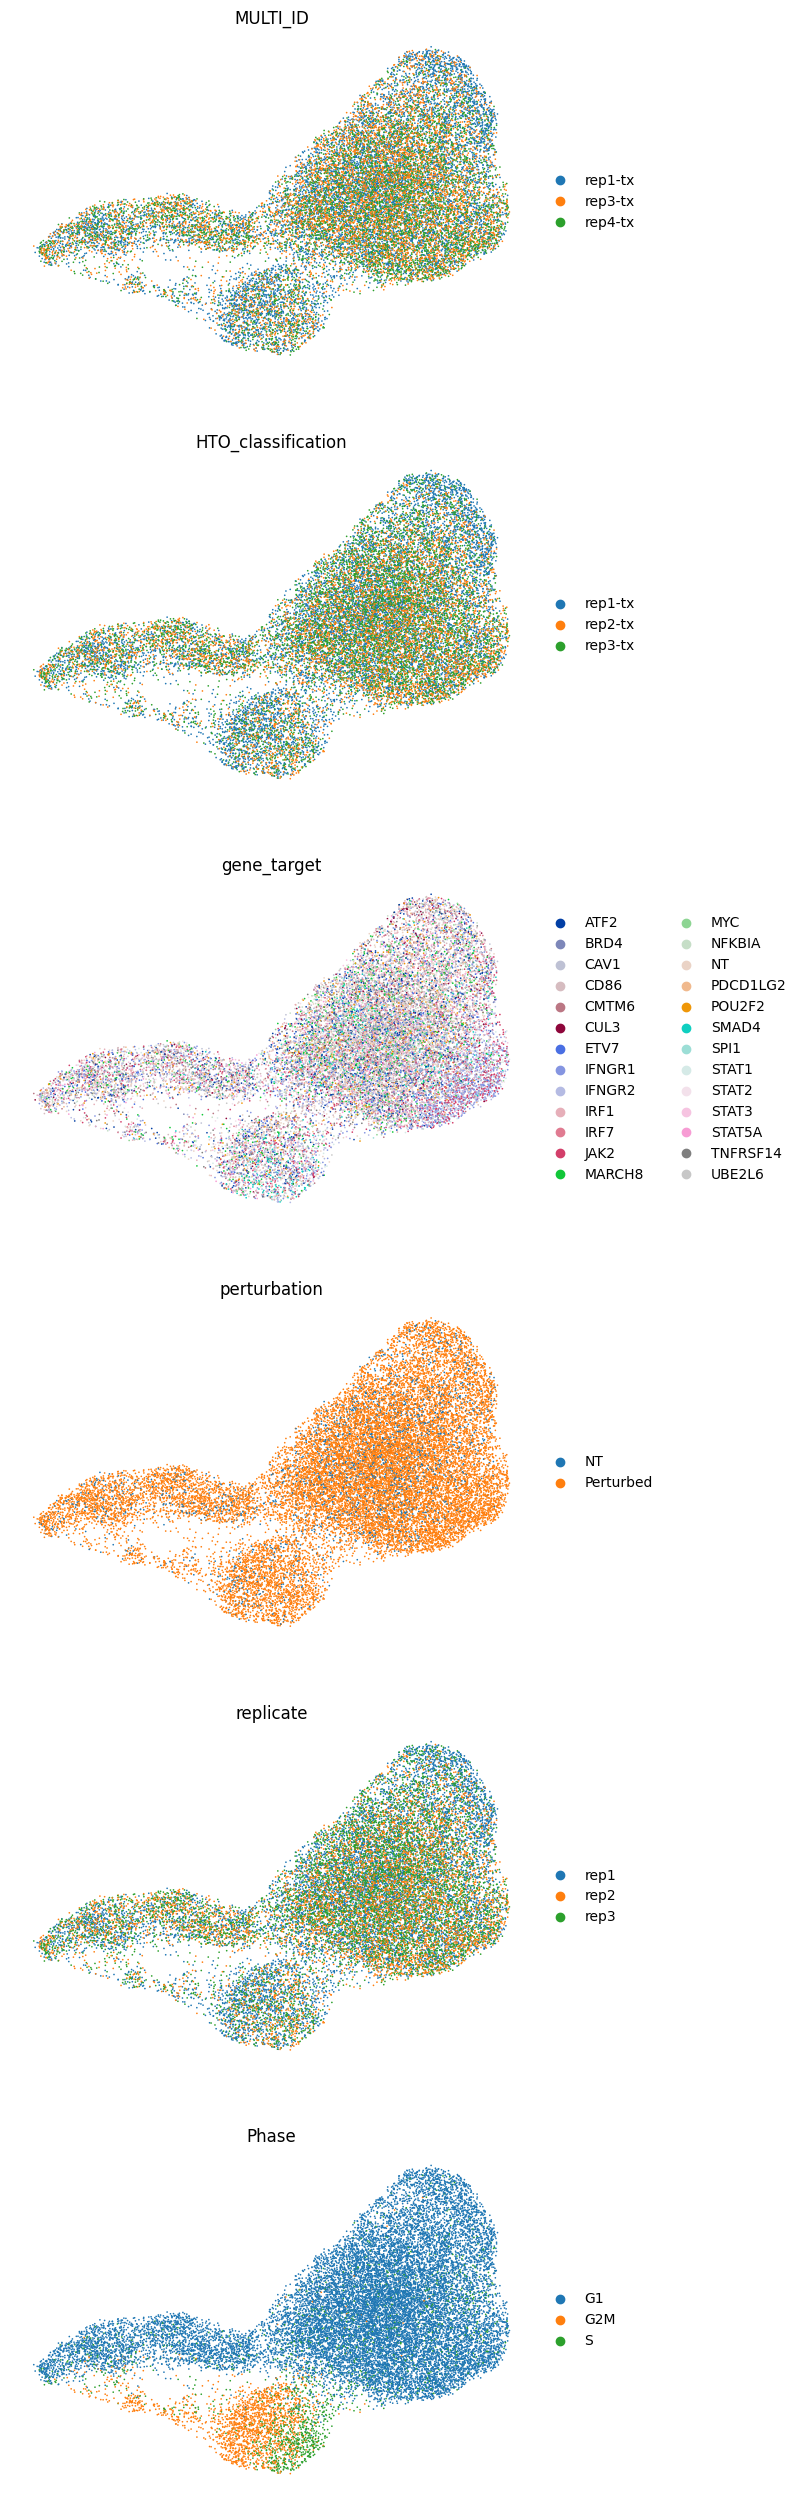

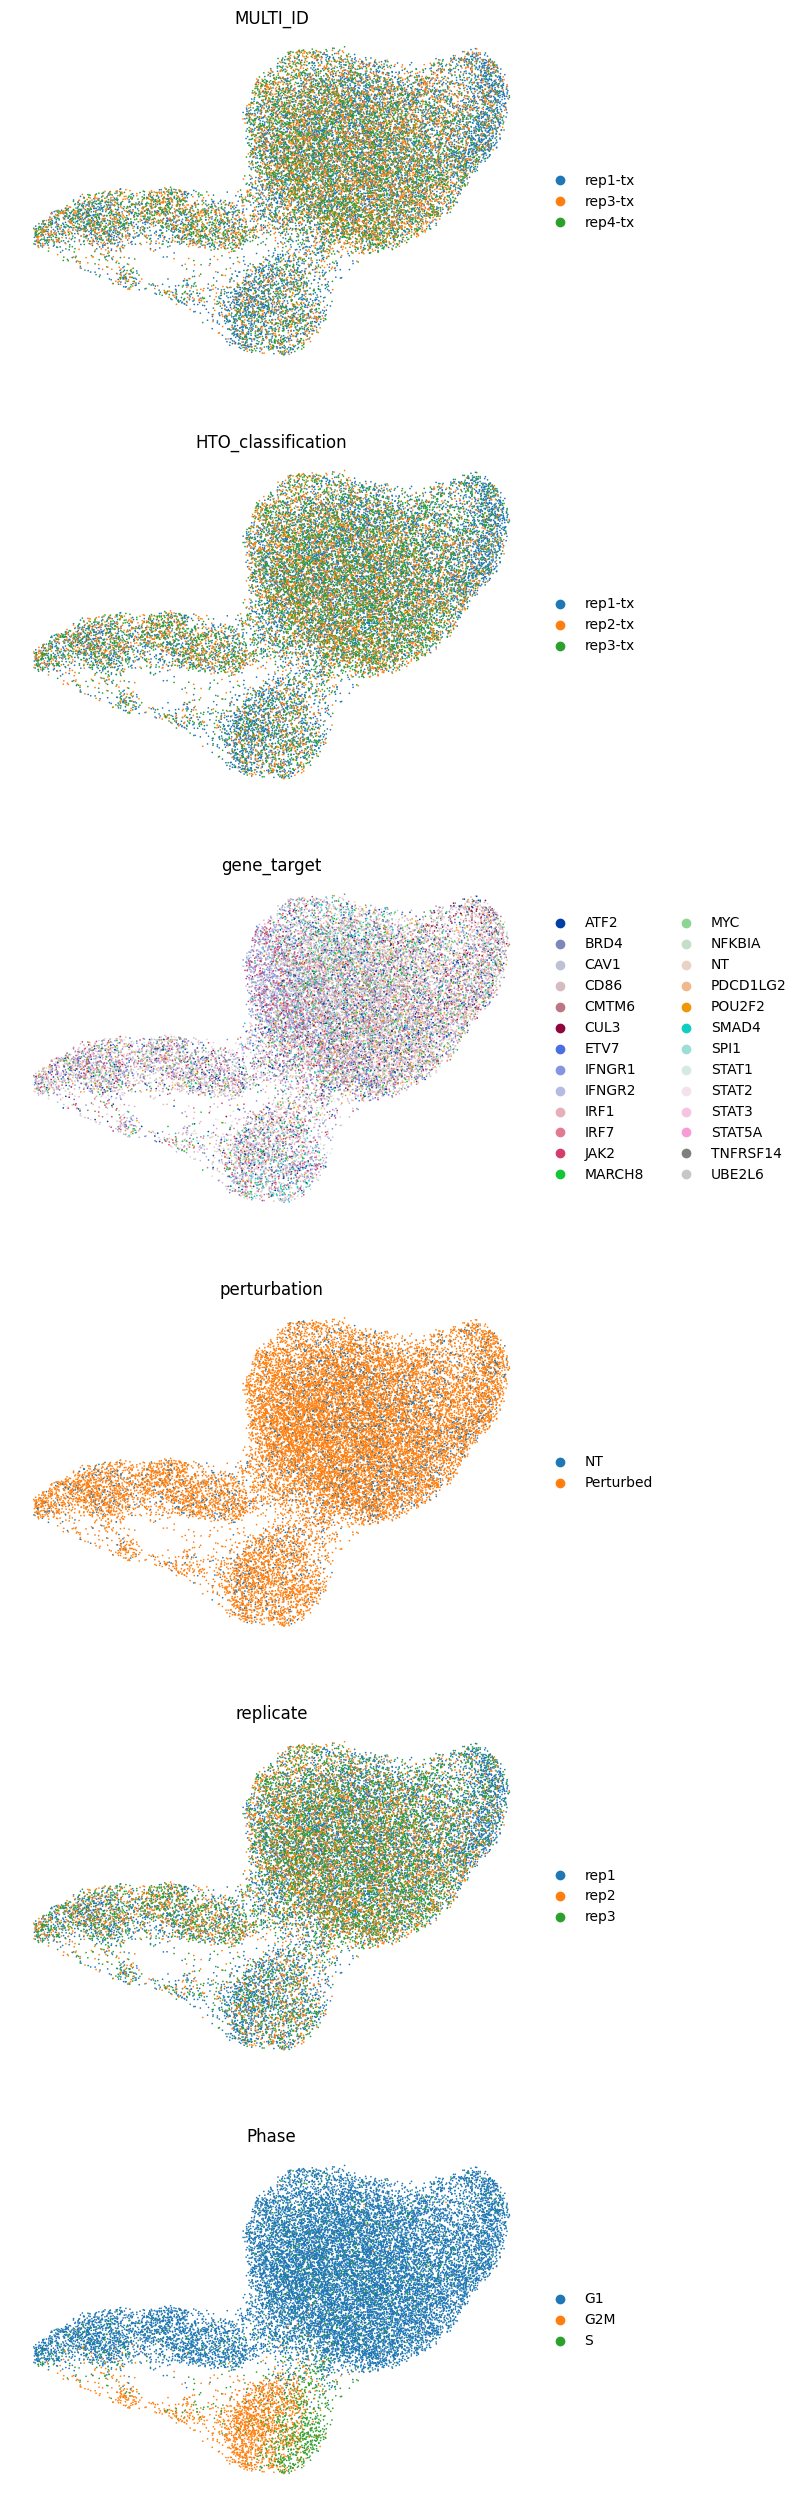

In [7]:
adata1=model.DL_model.adata.copy()
sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=["MULTI_ID","HTO_classification","gene_target","perturbation","replicate","Phase"], frameon=False, ncols=1)

sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=["MULTI_ID","HTO_classification","gene_target","perturbation","replicate","Phase"], frameon=False, ncols=1)

In [8]:
import rpy2.robjects as robjects

import anndata2ri
anndata2ri.activate()
# Add your library path
library_path = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3/"  # Replace with the actual path
# Update R's library paths
robjects.r(f'.libPaths(c("{library_path}", .libPaths()))')
# Verify the updated library paths
print(robjects.r('.libPaths()'))

from metrics import calculate_metrics

try:
    calculate_metrics(adata1, batch_key='gene_target', celltype_key="Phase", all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')
except:
    calculate_metrics(adata1, batch_key='gene_target', celltype_key="Phase", all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')

Unable to determine R library path: Command '('/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 127.


['/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3'
 '/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/library']
R_HOME is already set to: /vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R


/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/reproducible/metrics.py:29: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/numpy2ri.py:241: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '


LISI---


cLISI, bLISI, LISI_F1 0.9188518412850242 0.27087271641865174 0.41840254977261


ASW---


asw_label 0.5369665175676346


asw_batch 0.9077126520781662


kBET---


0 labels consist of a single batch or is too small. Skip.


Adding diffusion to step 4


Adding diffusion to step 4
Adding diffusion to step 5


Adding diffusion to step 6


Adding diffusion to step 7


Adding diffusion to step 8


kbet_score 0.8904822830286045
graph_conn 0.9558795462314021


NMI, ARI ---
NMI 0.38335854740851794
ARI 0.4611229452079878
positive and true positive rate---


                             ASW_label       ARI       NMI   1-cLISI  \
X_effect_modifier_space_PCA   0.536967  0.461123  0.383359  0.918852   

                                bLISI  ASW_batch  kBET Accept Rate  \
X_effect_modifier_space_PCA  0.270873   0.907713          0.890482   

                             graph connectivity  PCR_batch  pos rate  \
X_effect_modifier_space_PCA             0.95588   0.577333  0.920643   

                             true pos rate   F1 LISI  
X_effect_modifier_space_PCA       0.510251  0.418403  


In [9]:
model = NDreamer(adata, condition_key='perturbation', contorl_name='NT', num_hvg=2000, require_batch=True,
                            batch_key='replicate',
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=10, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./ECCITE_perturbation/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./ECCITE_perturbation/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)

1
Start data preprocessing
Original adata.obs[replicate] back up to adata.obs['batch_backup']
Original adata.obs[perturbation] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'NT': 0, 'Perturbed': 1}
Condition mapping to adata.obs['batch']: {'replicate': {'rep1': 0, 'rep3': 1, 'rep2': 2}}
Unique batch mapping: {'rep1': 0, 'rep3': 1, 'rep2': 2}
Calculating the clusters
Unique groups: ['0_NT' '0_Perturbed' '1_NT' '1_Perturbed' '2_NT' '2_Perturbed']


Finished clustering
Data preprocessing done
Remaining number of cells: 20729
Too few epoches (steps, if rigorously speaking). Changing epoch to 58 to adjust for number of cells
Require batch: True
Batch name to number mapping (may be used for search for saved adata):
 {'replicate': {'rep1': 0, 'rep3': 1, 'rep2': 2}}
Condition name to number mapping (may be used for search for saved adata):
 {'NT': 0, 'Perturbed': 1}
Preprocessing time: 24.09539 seconds


Overall Progress:   0%|          | 0/58 [00:00<?, ?it/s]

Epoch: 1/58 | All Loss: 125.6043 | Neighborhood Loss: 56.5754 | Triplet Loss: 32.0280 | Reconstruction Loss: 8.1974 | Independent Loss: 40.5342 | KL Loss: 0.3780 | Commitment Loss: 0.5871 | Dependent Loss: -12.6957


Epoch: 2/58 | All Loss: 101.0632 | Neighborhood Loss: 60.0903 | Triplet Loss: 14.4099 | Reconstruction Loss: 4.7164 | Independent Loss: 33.0416 | KL Loss: 0.3615 | Commitment Loss: 0.5755 | Dependent Loss: -12.1320


Epoch: 3/58 | All Loss: 86.2485 | Neighborhood Loss: 58.7905 | Triplet Loss: 8.6569 | Reconstruction Loss: 4.4686 | Independent Loss: 25.5183 | KL Loss: 0.2905 | Commitment Loss: 0.5699 | Dependent Loss: -12.0461


Epoch: 4/58 | All Loss: 81.0452 | Neighborhood Loss: 59.7345 | Triplet Loss: 6.7412 | Reconstruction Loss: 4.2442 | Independent Loss: 21.3055 | KL Loss: 0.2349 | Commitment Loss: 0.5614 | Dependent Loss: -11.7765


Resetting 695 unused embeddings.
Resetting 755 unused embeddings.
Resetting 700 unused embeddings.
Resetting 768 unused embeddings.


Resetting 728 unused embeddings.
Resetting 721 unused embeddings.
Resetting 709 unused embeddings.
Resetting 718 unused embeddings.


Resetting 736 unused embeddings.
Resetting 741 unused embeddings.
Resetting 697 unused embeddings.
Resetting 708 unused embeddings.


Resetting 669 unused embeddings.
Resetting 724 unused embeddings.
Resetting 739 unused embeddings.
Resetting 758 unused embeddings.


Resetting 701 unused embeddings.
Resetting 705 unused embeddings.
Resetting 720 unused embeddings.
Resetting 726 unused embeddings.


Resetting 746 unused embeddings.
Resetting 705 unused embeddings.
Resetting 685 unused embeddings.
Resetting 722 unused embeddings.


Resetting 700 unused embeddings.
Resetting 713 unused embeddings.
Resetting 710 unused embeddings.
Resetting 757 unused embeddings.


Resetting 756 unused embeddings.
Resetting 695 unused embeddings.
Resetting 714 unused embeddings.
Resetting 734 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 4
Epoch: 5/58 | All Loss: 62.8708 | Neighborhood Loss: 49.1415 | Triplet Loss: 4.8596 | Reconstruction Loss: 3.4619 | Independent Loss: 14.4276 | KL Loss: 0.1725 | Commitment Loss: 0.4649 | Dependent Loss: -9.6573


Epoch: 6/58 | All Loss: 75.9921 | Neighborhood Loss: 61.5984 | Triplet Loss: 8.9805 | Reconstruction Loss: 4.1375 | Independent Loss: 9.8258 | KL Loss: 0.1438 | Commitment Loss: 0.3094 | Dependent Loss: -9.0032


Epoch: 7/58 | All Loss: 71.7342 | Neighborhood Loss: 60.6267 | Triplet Loss: 6.2375 | Reconstruction Loss: 4.1015 | Independent Loss: 9.3774 | KL Loss: 0.1179 | Commitment Loss: 0.3054 | Dependent Loss: -9.0322


Epoch: 8/58 | All Loss: 68.1234 | Neighborhood Loss: 59.6750 | Triplet Loss: 4.9929 | Reconstruction Loss: 4.0256 | Independent Loss: 8.0694 | KL Loss: 0.1019 | Commitment Loss: 0.3079 | Dependent Loss: -9.0493


Epoch: 9/58 | All Loss: 69.2000 | Neighborhood Loss: 60.1229 | Triplet Loss: 5.0248 | Reconstruction Loss: 4.0206 | Independent Loss: 8.5377 | KL Loss: 0.0890 | Commitment Loss: 0.3083 | Dependent Loss: -8.9033


Resetting 684 unused embeddings.
Resetting 684 unused embeddings.
Resetting 720 unused embeddings.
Resetting 743 unused embeddings.


Resetting 703 unused embeddings.
Resetting 701 unused embeddings.
Resetting 700 unused embeddings.
Resetting 737 unused embeddings.


Resetting 723 unused embeddings.
Resetting 680 unused embeddings.
Resetting 691 unused embeddings.
Resetting 723 unused embeddings.


Resetting 681 unused embeddings.
Resetting 675 unused embeddings.
Resetting 669 unused embeddings.
Resetting 697 unused embeddings.


Resetting 694 unused embeddings.
Resetting 664 unused embeddings.
Resetting 706 unused embeddings.
Resetting 739 unused embeddings.


Resetting 694 unused embeddings.
Resetting 680 unused embeddings.
Resetting 702 unused embeddings.
Resetting 693 unused embeddings.


Resetting 676 unused embeddings.
Resetting 702 unused embeddings.
Resetting 672 unused embeddings.
Resetting 712 unused embeddings.


Resetting 669 unused embeddings.
Resetting 752 unused embeddings.
Resetting 693 unused embeddings.
Resetting 726 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 9
Epoch: 10/58 | All Loss: 53.4680 | Neighborhood Loss: 46.9647 | Triplet Loss: 3.4608 | Reconstruction Loss: 3.3398 | Independent Loss: 6.8767 | KL Loss: 0.0681 | Commitment Loss: 0.2586 | Dependent Loss: -7.5008


Epoch: 11/58 | All Loss: 67.5301 | Neighborhood Loss: 60.5917 | Triplet Loss: 3.5450 | Reconstruction Loss: 3.9931 | Independent Loss: 8.3852 | KL Loss: 0.0782 | Commitment Loss: 0.2671 | Dependent Loss: -9.3303


Epoch: 12/58 | All Loss: 65.8956 | Neighborhood Loss: 59.5865 | Triplet Loss: 3.7277 | Reconstruction Loss: 3.9734 | Independent Loss: 7.4220 | KL Loss: 0.0680 | Commitment Loss: 0.2689 | Dependent Loss: -9.1509


Epoch: 13/58 | All Loss: 63.4996 | Neighborhood Loss: 57.6330 | Triplet Loss: 3.7202 | Reconstruction Loss: 3.9271 | Independent Loss: 7.1760 | KL Loss: 0.0668 | Commitment Loss: 0.2718 | Dependent Loss: -9.2952


Epoch: 14/58 | All Loss: 64.0818 | Neighborhood Loss: 58.0753 | Triplet Loss: 3.6836 | Reconstruction Loss: 3.9335 | Independent Loss: 7.2128 | KL Loss: 0.0644 | Commitment Loss: 0.2736 | Dependent Loss: -9.1613


Resetting 681 unused embeddings.
Resetting 681 unused embeddings.
Resetting 696 unused embeddings.
Resetting 728 unused embeddings.


Resetting 688 unused embeddings.
Resetting 679 unused embeddings.
Resetting 665 unused embeddings.
Resetting 686 unused embeddings.


Resetting 699 unused embeddings.
Resetting 663 unused embeddings.
Resetting 667 unused embeddings.
Resetting 692 unused embeddings.


Resetting 654 unused embeddings.
Resetting 662 unused embeddings.
Resetting 652 unused embeddings.
Resetting 645 unused embeddings.


Resetting 667 unused embeddings.
Resetting 654 unused embeddings.
Resetting 683 unused embeddings.
Resetting 687 unused embeddings.


Resetting 681 unused embeddings.
Resetting 655 unused embeddings.
Resetting 644 unused embeddings.
Resetting 661 unused embeddings.


Resetting 647 unused embeddings.
Resetting 661 unused embeddings.
Resetting 651 unused embeddings.
Resetting 676 unused embeddings.


Resetting 666 unused embeddings.
Resetting 717 unused embeddings.
Resetting 665 unused embeddings.
Resetting 707 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 14
Epoch: 15/58 | All Loss: 53.3561 | Neighborhood Loss: 48.5257 | Triplet Loss: 2.8856 | Reconstruction Loss: 3.2349 | Independent Loss: 6.1596 | KL Loss: 0.0542 | Commitment Loss: 0.2310 | Dependent Loss: -7.7350


Epoch: 16/58 | All Loss: 63.0945 | Neighborhood Loss: 57.7364 | Triplet Loss: 3.3067 | Reconstruction Loss: 3.8885 | Independent Loss: 7.2358 | KL Loss: 0.0651 | Commitment Loss: 0.2648 | Dependent Loss: -9.4027


Epoch: 17/58 | All Loss: 63.0472 | Neighborhood Loss: 57.8988 | Triplet Loss: 3.0860 | Reconstruction Loss: 3.8507 | Independent Loss: 7.2694 | KL Loss: 0.0631 | Commitment Loss: 0.2658 | Dependent Loss: -9.3866


Epoch: 18/58 | All Loss: 61.8499 | Neighborhood Loss: 57.2396 | Triplet Loss: 2.9846 | Reconstruction Loss: 3.8553 | Independent Loss: 6.7869 | KL Loss: 0.0618 | Commitment Loss: 0.2683 | Dependent Loss: -9.3466


Epoch: 19/58 | All Loss: 62.0672 | Neighborhood Loss: 56.2451 | Triplet Loss: 3.6561 | Reconstruction Loss: 3.8342 | Independent Loss: 7.3538 | KL Loss: 0.0628 | Commitment Loss: 0.2699 | Dependent Loss: -9.3548


Resetting 681 unused embeddings.
Resetting 689 unused embeddings.
Resetting 686 unused embeddings.
Resetting 728 unused embeddings.


Resetting 685 unused embeddings.
Resetting 667 unused embeddings.
Resetting 669 unused embeddings.
Resetting 669 unused embeddings.


Resetting 698 unused embeddings.
Resetting 656 unused embeddings.
Resetting 665 unused embeddings.
Resetting 690 unused embeddings.


Resetting 665 unused embeddings.
Resetting 662 unused embeddings.
Resetting 656 unused embeddings.
Resetting 656 unused embeddings.


Resetting 668 unused embeddings.
Resetting 659 unused embeddings.
Resetting 681 unused embeddings.
Resetting 676 unused embeddings.


Resetting 689 unused embeddings.
Resetting 650 unused embeddings.
Resetting 641 unused embeddings.
Resetting 664 unused embeddings.


Resetting 656 unused embeddings.
Resetting 661 unused embeddings.
Resetting 656 unused embeddings.
Resetting 672 unused embeddings.


Resetting 669 unused embeddings.
Resetting 696 unused embeddings.
Resetting 681 unused embeddings.
Resetting 713 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 19
Epoch: 20/58 | All Loss: 51.7888 | Neighborhood Loss: 47.5583 | Triplet Loss: 2.5044 | Reconstruction Loss: 3.1816 | Independent Loss: 6.0026 | KL Loss: 0.0546 | Commitment Loss: 0.2247 | Dependent Loss: -7.7374


Epoch: 21/58 | All Loss: 60.8681 | Neighborhood Loss: 56.2583 | Triplet Loss: 2.7849 | Reconstruction Loss: 3.7943 | Independent Loss: 7.1400 | KL Loss: 0.0653 | Commitment Loss: 0.2639 | Dependent Loss: -9.4387


Epoch: 22/58 | All Loss: 60.5694 | Neighborhood Loss: 55.7714 | Triplet Loss: 3.6623 | Reconstruction Loss: 3.8248 | Independent Loss: 6.3384 | KL Loss: 0.0635 | Commitment Loss: 0.2672 | Dependent Loss: -9.3583


Epoch: 23/58 | All Loss: 58.7866 | Neighborhood Loss: 54.9995 | Triplet Loss: 3.1185 | Reconstruction Loss: 3.8228 | Independent Loss: 5.8827 | KL Loss: 0.0647 | Commitment Loss: 0.2678 | Dependent Loss: -9.3693


Epoch: 24/58 | All Loss: 59.7122 | Neighborhood Loss: 55.6894 | Triplet Loss: 3.3577 | Reconstruction Loss: 3.7877 | Independent Loss: 5.9217 | KL Loss: 0.0652 | Commitment Loss: 0.2708 | Dependent Loss: -9.3805


Resetting 682 unused embeddings.
Resetting 696 unused embeddings.
Resetting 691 unused embeddings.
Resetting 722 unused embeddings.


Resetting 682 unused embeddings.
Resetting 670 unused embeddings.
Resetting 673 unused embeddings.
Resetting 680 unused embeddings.


Resetting 704 unused embeddings.
Resetting 653 unused embeddings.
Resetting 673 unused embeddings.
Resetting 690 unused embeddings.


Resetting 675 unused embeddings.
Resetting 669 unused embeddings.
Resetting 651 unused embeddings.
Resetting 665 unused embeddings.


Resetting 674 unused embeddings.
Resetting 664 unused embeddings.
Resetting 689 unused embeddings.
Resetting 670 unused embeddings.


Resetting 696 unused embeddings.
Resetting 659 unused embeddings.
Resetting 639 unused embeddings.
Resetting 672 unused embeddings.


Resetting 666 unused embeddings.
Resetting 658 unused embeddings.
Resetting 663 unused embeddings.
Resetting 673 unused embeddings.


Resetting 684 unused embeddings.
Resetting 699 unused embeddings.
Resetting 687 unused embeddings.
Resetting 708 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 24
Epoch: 25/58 | All Loss: 48.8298 | Neighborhood Loss: 45.7075 | Triplet Loss: 2.5436 | Reconstruction Loss: 3.1686 | Independent Loss: 4.9194 | KL Loss: 0.0509 | Commitment Loss: 0.2253 | Dependent Loss: -7.7855


Epoch: 26/58 | All Loss: 61.6524 | Neighborhood Loss: 57.4905 | Triplet Loss: 3.1972 | Reconstruction Loss: 3.7938 | Independent Loss: 6.3711 | KL Loss: 0.0654 | Commitment Loss: 0.2614 | Dependent Loss: -9.5269


Epoch: 27/58 | All Loss: 62.0398 | Neighborhood Loss: 57.8912 | Triplet Loss: 3.1385 | Reconstruction Loss: 3.7690 | Independent Loss: 6.5175 | KL Loss: 0.0656 | Commitment Loss: 0.2634 | Dependent Loss: -9.6054


Epoch: 28/58 | All Loss: 60.9689 | Neighborhood Loss: 57.5819 | Triplet Loss: 3.0590 | Reconstruction Loss: 3.7738 | Independent Loss: 5.7916 | KL Loss: 0.0630 | Commitment Loss: 0.2640 | Dependent Loss: -9.5645


Epoch: 29/58 | All Loss: 61.6522 | Neighborhood Loss: 57.9914 | Triplet Loss: 3.0680 | Reconstruction Loss: 3.7448 | Independent Loss: 6.1443 | KL Loss: 0.0611 | Commitment Loss: 0.2627 | Dependent Loss: -9.6201


Resetting 684 unused embeddings.
Resetting 698 unused embeddings.
Resetting 693 unused embeddings.
Resetting 709 unused embeddings.


Resetting 690 unused embeddings.
Resetting 680 unused embeddings.
Resetting 675 unused embeddings.
Resetting 679 unused embeddings.


Resetting 704 unused embeddings.
Resetting 666 unused embeddings.
Resetting 686 unused embeddings.
Resetting 693 unused embeddings.


Resetting 678 unused embeddings.
Resetting 672 unused embeddings.
Resetting 656 unused embeddings.
Resetting 664 unused embeddings.


Resetting 674 unused embeddings.
Resetting 662 unused embeddings.
Resetting 685 unused embeddings.
Resetting 678 unused embeddings.


Resetting 695 unused embeddings.
Resetting 660 unused embeddings.
Resetting 652 unused embeddings.
Resetting 679 unused embeddings.


Resetting 676 unused embeddings.
Resetting 663 unused embeddings.
Resetting 672 unused embeddings.
Resetting 677 unused embeddings.


Resetting 689 unused embeddings.
Resetting 704 unused embeddings.
Resetting 696 unused embeddings.
Resetting 705 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 29
Epoch: 30/58 | All Loss: 49.1855 | Neighborhood Loss: 46.4544 | Triplet Loss: 2.1708 | Reconstruction Loss: 3.1079 | Independent Loss: 5.2564 | KL Loss: 0.0545 | Commitment Loss: 0.2215 | Dependent Loss: -8.0799


Epoch: 31/58 | All Loss: 57.6800 | Neighborhood Loss: 54.2029 | Triplet Loss: 2.9094 | Reconstruction Loss: 3.7290 | Independent Loss: 6.3950 | KL Loss: 0.0642 | Commitment Loss: 0.2588 | Dependent Loss: -9.8794


Epoch: 32/58 | All Loss: 61.2668 | Neighborhood Loss: 57.7789 | Triplet Loss: 2.8725 | Reconstruction Loss: 3.7627 | Independent Loss: 6.4489 | KL Loss: 0.0589 | Commitment Loss: 0.2616 | Dependent Loss: -9.9168


Epoch: 33/58 | All Loss: 56.3732 | Neighborhood Loss: 53.2523 | Triplet Loss: 2.5335 | Reconstruction Loss: 3.7513 | Independent Loss: 6.2854 | KL Loss: 0.0631 | Commitment Loss: 0.2629 | Dependent Loss: -9.7753


Epoch: 34/58 | All Loss: 58.4734 | Neighborhood Loss: 54.8780 | Triplet Loss: 3.1141 | Reconstruction Loss: 3.7536 | Independent Loss: 6.3043 | KL Loss: 0.0607 | Commitment Loss: 0.2667 | Dependent Loss: -9.9040


Resetting 688 unused embeddings.
Resetting 702 unused embeddings.
Resetting 678 unused embeddings.
Resetting 708 unused embeddings.


Resetting 694 unused embeddings.
Resetting 680 unused embeddings.
Resetting 680 unused embeddings.
Resetting 686 unused embeddings.


Resetting 705 unused embeddings.
Resetting 672 unused embeddings.
Resetting 689 unused embeddings.
Resetting 697 unused embeddings.


Resetting 676 unused embeddings.
Resetting 683 unused embeddings.
Resetting 661 unused embeddings.
Resetting 670 unused embeddings.


Resetting 676 unused embeddings.
Resetting 660 unused embeddings.
Resetting 695 unused embeddings.
Resetting 679 unused embeddings.


Resetting 699 unused embeddings.
Resetting 654 unused embeddings.
Resetting 658 unused embeddings.
Resetting 687 unused embeddings.


Resetting 682 unused embeddings.
Resetting 662 unused embeddings.
Resetting 676 unused embeddings.
Resetting 685 unused embeddings.


Resetting 692 unused embeddings.
Resetting 705 unused embeddings.
Resetting 704 unused embeddings.
Resetting 704 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 34
Epoch: 35/58 | All Loss: 47.8364 | Neighborhood Loss: 45.9390 | Triplet Loss: 2.3571 | Reconstruction Loss: 3.1231 | Independent Loss: 4.3075 | KL Loss: 0.0542 | Commitment Loss: 0.2259 | Dependent Loss: -8.1703


Epoch: 36/58 | All Loss: 59.1871 | Neighborhood Loss: 55.4804 | Triplet Loss: 2.5614 | Reconstruction Loss: 3.7265 | Independent Loss: 7.0267 | KL Loss: 0.0682 | Commitment Loss: 0.2654 | Dependent Loss: -9.9414


Epoch: 37/58 | All Loss: 57.7486 | Neighborhood Loss: 53.6341 | Triplet Loss: 3.2014 | Reconstruction Loss: 3.7205 | Independent Loss: 6.7438 | KL Loss: 0.0683 | Commitment Loss: 0.2683 | Dependent Loss: -9.8878


Epoch: 38/58 | All Loss: 53.3853 | Neighborhood Loss: 49.2334 | Triplet Loss: 2.8636 | Reconstruction Loss: 3.7362 | Independent Loss: 7.0830 | KL Loss: 0.0691 | Commitment Loss: 0.2740 | Dependent Loss: -9.8740


Epoch: 39/58 | All Loss: 55.2253 | Neighborhood Loss: 51.9323 | Triplet Loss: 2.7049 | Reconstruction Loss: 3.7059 | Independent Loss: 6.4491 | KL Loss: 0.0706 | Commitment Loss: 0.2798 | Dependent Loss: -9.9173


Resetting 691 unused embeddings.
Resetting 706 unused embeddings.
Resetting 683 unused embeddings.
Resetting 706 unused embeddings.


Resetting 687 unused embeddings.
Resetting 686 unused embeddings.
Resetting 686 unused embeddings.
Resetting 684 unused embeddings.


Resetting 706 unused embeddings.
Resetting 670 unused embeddings.
Resetting 689 unused embeddings.
Resetting 706 unused embeddings.


Resetting 676 unused embeddings.
Resetting 689 unused embeddings.
Resetting 659 unused embeddings.
Resetting 672 unused embeddings.


Resetting 673 unused embeddings.
Resetting 664 unused embeddings.
Resetting 695 unused embeddings.
Resetting 679 unused embeddings.


Resetting 694 unused embeddings.
Resetting 654 unused embeddings.
Resetting 664 unused embeddings.
Resetting 692 unused embeddings.


Resetting 681 unused embeddings.
Resetting 664 unused embeddings.
Resetting 677 unused embeddings.
Resetting 684 unused embeddings.


Resetting 696 unused embeddings.
Resetting 702 unused embeddings.
Resetting 702 unused embeddings.
Resetting 700 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 39
Epoch: 40/58 | All Loss: 45.1431 | Neighborhood Loss: 41.6641 | Triplet Loss: 2.1167 | Reconstruction Loss: 3.0827 | Independent Loss: 6.1298 | KL Loss: 0.0590 | Commitment Loss: 0.2347 | Dependent Loss: -8.1439


Epoch: 41/58 | All Loss: 57.4739 | Neighborhood Loss: 52.6556 | Triplet Loss: 3.2866 | Reconstruction Loss: 3.7024 | Independent Loss: 7.5469 | KL Loss: 0.0784 | Commitment Loss: 0.2749 | Dependent Loss: -10.0710


Epoch: 42/58 | All Loss: 54.4644 | Neighborhood Loss: 50.2150 | Triplet Loss: 3.0997 | Reconstruction Loss: 3.7010 | Independent Loss: 7.1822 | KL Loss: 0.0778 | Commitment Loss: 0.2760 | Dependent Loss: -10.0873


Epoch: 43/58 | All Loss: 55.4160 | Neighborhood Loss: 51.4834 | Triplet Loss: 2.7598 | Reconstruction Loss: 3.6830 | Independent Loss: 7.4695 | KL Loss: 0.0795 | Commitment Loss: 0.2811 | Dependent Loss: -10.3402


Epoch: 44/58 | All Loss: 53.8066 | Neighborhood Loss: 49.2134 | Triplet Loss: 3.3443 | Reconstruction Loss: 3.6834 | Independent Loss: 7.5779 | KL Loss: 0.0800 | Commitment Loss: 0.2855 | Dependent Loss: -10.3780


Resetting 692 unused embeddings.
Resetting 709 unused embeddings.
Resetting 686 unused embeddings.
Resetting 708 unused embeddings.


Resetting 679 unused embeddings.
Resetting 693 unused embeddings.
Resetting 688 unused embeddings.
Resetting 688 unused embeddings.


Resetting 711 unused embeddings.
Resetting 677 unused embeddings.
Resetting 680 unused embeddings.
Resetting 707 unused embeddings.


Resetting 673 unused embeddings.
Resetting 691 unused embeddings.
Resetting 660 unused embeddings.
Resetting 669 unused embeddings.


Resetting 674 unused embeddings.
Resetting 663 unused embeddings.
Resetting 695 unused embeddings.
Resetting 680 unused embeddings.


Resetting 682 unused embeddings.
Resetting 652 unused embeddings.
Resetting 671 unused embeddings.
Resetting 690 unused embeddings.


Resetting 687 unused embeddings.
Resetting 664 unused embeddings.
Resetting 682 unused embeddings.
Resetting 688 unused embeddings.


Resetting 699 unused embeddings.
Resetting 698 unused embeddings.
Resetting 702 unused embeddings.
Resetting 704 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 44
Epoch: 45/58 | All Loss: 46.3266 | Neighborhood Loss: 42.6392 | Triplet Loss: 2.6615 | Reconstruction Loss: 3.0565 | Independent Loss: 6.2058 | KL Loss: 0.0673 | Commitment Loss: 0.2398 | Dependent Loss: -8.5435


Epoch: 46/58 | All Loss: 56.0944 | Neighborhood Loss: 51.5952 | Triplet Loss: 3.0171 | Reconstruction Loss: 3.6839 | Independent Loss: 8.2881 | KL Loss: 0.0876 | Commitment Loss: 0.2827 | Dependent Loss: -10.8602


Epoch: 47/58 | All Loss: 55.0077 | Neighborhood Loss: 50.5535 | Triplet Loss: 3.3035 | Reconstruction Loss: 3.6474 | Independent Loss: 7.9399 | KL Loss: 0.0948 | Commitment Loss: 0.2848 | Dependent Loss: -10.8162


Epoch: 48/58 | All Loss: 55.4523 | Neighborhood Loss: 49.4238 | Triplet Loss: 4.1057 | Reconstruction Loss: 3.6314 | Independent Loss: 8.6359 | KL Loss: 0.0936 | Commitment Loss: 0.2894 | Dependent Loss: -10.7276


Epoch: 49/58 | All Loss: 54.3519 | Neighborhood Loss: 48.9656 | Triplet Loss: 3.5112 | Reconstruction Loss: 3.6820 | Independent Loss: 8.4063 | KL Loss: 0.0886 | Commitment Loss: 0.2959 | Dependent Loss: -10.5976


Resetting 690 unused embeddings.
Resetting 706 unused embeddings.
Resetting 684 unused embeddings.
Resetting 707 unused embeddings.


Resetting 682 unused embeddings.
Resetting 701 unused embeddings.
Resetting 689 unused embeddings.
Resetting 687 unused embeddings.


Resetting 713 unused embeddings.
Resetting 677 unused embeddings.
Resetting 680 unused embeddings.
Resetting 708 unused embeddings.


Resetting 667 unused embeddings.
Resetting 691 unused embeddings.
Resetting 662 unused embeddings.
Resetting 668 unused embeddings.


Resetting 675 unused embeddings.
Resetting 658 unused embeddings.


Resetting 684 unused embeddings.
Resetting 679 unused embeddings.
Resetting 689 unused embeddings.
Resetting 658 unused embeddings.


Resetting 675 unused embeddings.
Resetting 692 unused embeddings.
Resetting 678 unused embeddings.
Resetting 667 unused embeddings.


Resetting 691 unused embeddings.
Resetting 689 unused embeddings.
Resetting 701 unused embeddings.
Resetting 697 unused embeddings.


Resetting 707 unused embeddings.
Resetting 703 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 49
Epoch: 50/58 | All Loss: 47.0910 | Neighborhood Loss: 42.1315 | Triplet Loss: 3.1207 | Reconstruction Loss: 3.0661 | Independent Loss: 7.1096 | KL Loss: 0.0772 | Commitment Loss: 0.2475 | Dependent Loss: -8.6617


Epoch: 51/58 | All Loss: 55.9264 | Neighborhood Loss: 49.9252 | Triplet Loss: 3.6275 | Reconstruction Loss: 3.6497 | Independent Loss: 9.3336 | KL Loss: 0.0949 | Commitment Loss: 0.2942 | Dependent Loss: -10.9988


Epoch: 52/58 | All Loss: 54.2151 | Neighborhood Loss: 48.9154 | Triplet Loss: 3.0015 | Reconstruction Loss: 3.6852 | Independent Loss: 9.1265 | KL Loss: 0.0933 | Commitment Loss: 0.2974 | Dependent Loss: -10.9042


Epoch: 53/58 | All Loss: 55.1708 | Neighborhood Loss: 48.3178 | Triplet Loss: 4.0619 | Reconstruction Loss: 3.6790 | Independent Loss: 9.4528 | KL Loss: 0.0920 | Commitment Loss: 0.3016 | Dependent Loss: -10.7343


Epoch: 54/58 | All Loss: 52.4556 | Neighborhood Loss: 46.8208 | Triplet Loss: 3.7908 | Reconstruction Loss: 3.6529 | Independent Loss: 8.5542 | KL Loss: 0.0910 | Commitment Loss: 0.3028 | Dependent Loss: -10.7569


Resetting 688 unused embeddings.
Resetting 705 unused embeddings.
Resetting 686 unused embeddings.
Resetting 709 unused embeddings.


Resetting 684 unused embeddings.
Resetting 703 unused embeddings.
Resetting 688 unused embeddings.
Resetting 685 unused embeddings.


Resetting 716 unused embeddings.
Resetting 677 unused embeddings.
Resetting 679 unused embeddings.
Resetting 710 unused embeddings.


Resetting 671 unused embeddings.
Resetting 692 unused embeddings.
Resetting 661 unused embeddings.
Resetting 667 unused embeddings.


Resetting 677 unused embeddings.
Resetting 658 unused embeddings.
Resetting 683 unused embeddings.
Resetting 683 unused embeddings.


Resetting 690 unused embeddings.
Resetting 661 unused embeddings.
Resetting 682 unused embeddings.
Resetting 699 unused embeddings.


Resetting 683 unused embeddings.
Resetting 670 unused embeddings.
Resetting 700 unused embeddings.
Resetting 690 unused embeddings.


Resetting 704 unused embeddings.
Resetting 698 unused embeddings.
Resetting 710 unused embeddings.
Resetting 706 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 54
Epoch: 55/58 | All Loss: 43.8589 | Neighborhood Loss: 39.6505 | Triplet Loss: 2.6627 | Reconstruction Loss: 3.0558 | Independent Loss: 7.0464 | KL Loss: 0.0724 | Commitment Loss: 0.2553 | Dependent Loss: -8.8841


Epoch: 56/58 | All Loss: 51.5537 | Neighborhood Loss: 45.2762 | Triplet Loss: 3.7764 | Reconstruction Loss: 3.6605 | Independent Loss: 9.6478 | KL Loss: 0.0957 | Commitment Loss: 0.3028 | Dependent Loss: -11.2056


Epoch: 57/58 | All Loss: 52.3165 | Neighborhood Loss: 45.7283 | Triplet Loss: 3.7035 | Reconstruction Loss: 3.6542 | Independent Loss: 9.9494 | KL Loss: 0.0910 | Commitment Loss: 0.3049 | Dependent Loss: -11.1149


Epoch: 58/58 | All Loss: 51.0166 | Neighborhood Loss: 44.2173 | Triplet Loss: 3.5258 | Reconstruction Loss: 3.6804 | Independent Loss: 10.1923 | KL Loss: 0.0888 | Commitment Loss: 0.3103 | Dependent Loss: -10.9984
Model training time: 1639.59139 seconds


Effect modifier space saved.
Model evaluating time: 49.72737 seconds


ITE evaluating: 0.86584 seconds


ITE evaluating: 5.95962 seconds


ITE evaluating: 0.70871 seconds


ITE evaluating: 4.03342 seconds


ITE evaluating: 0.62616 seconds


ITE evaluating: 3.51149 seconds


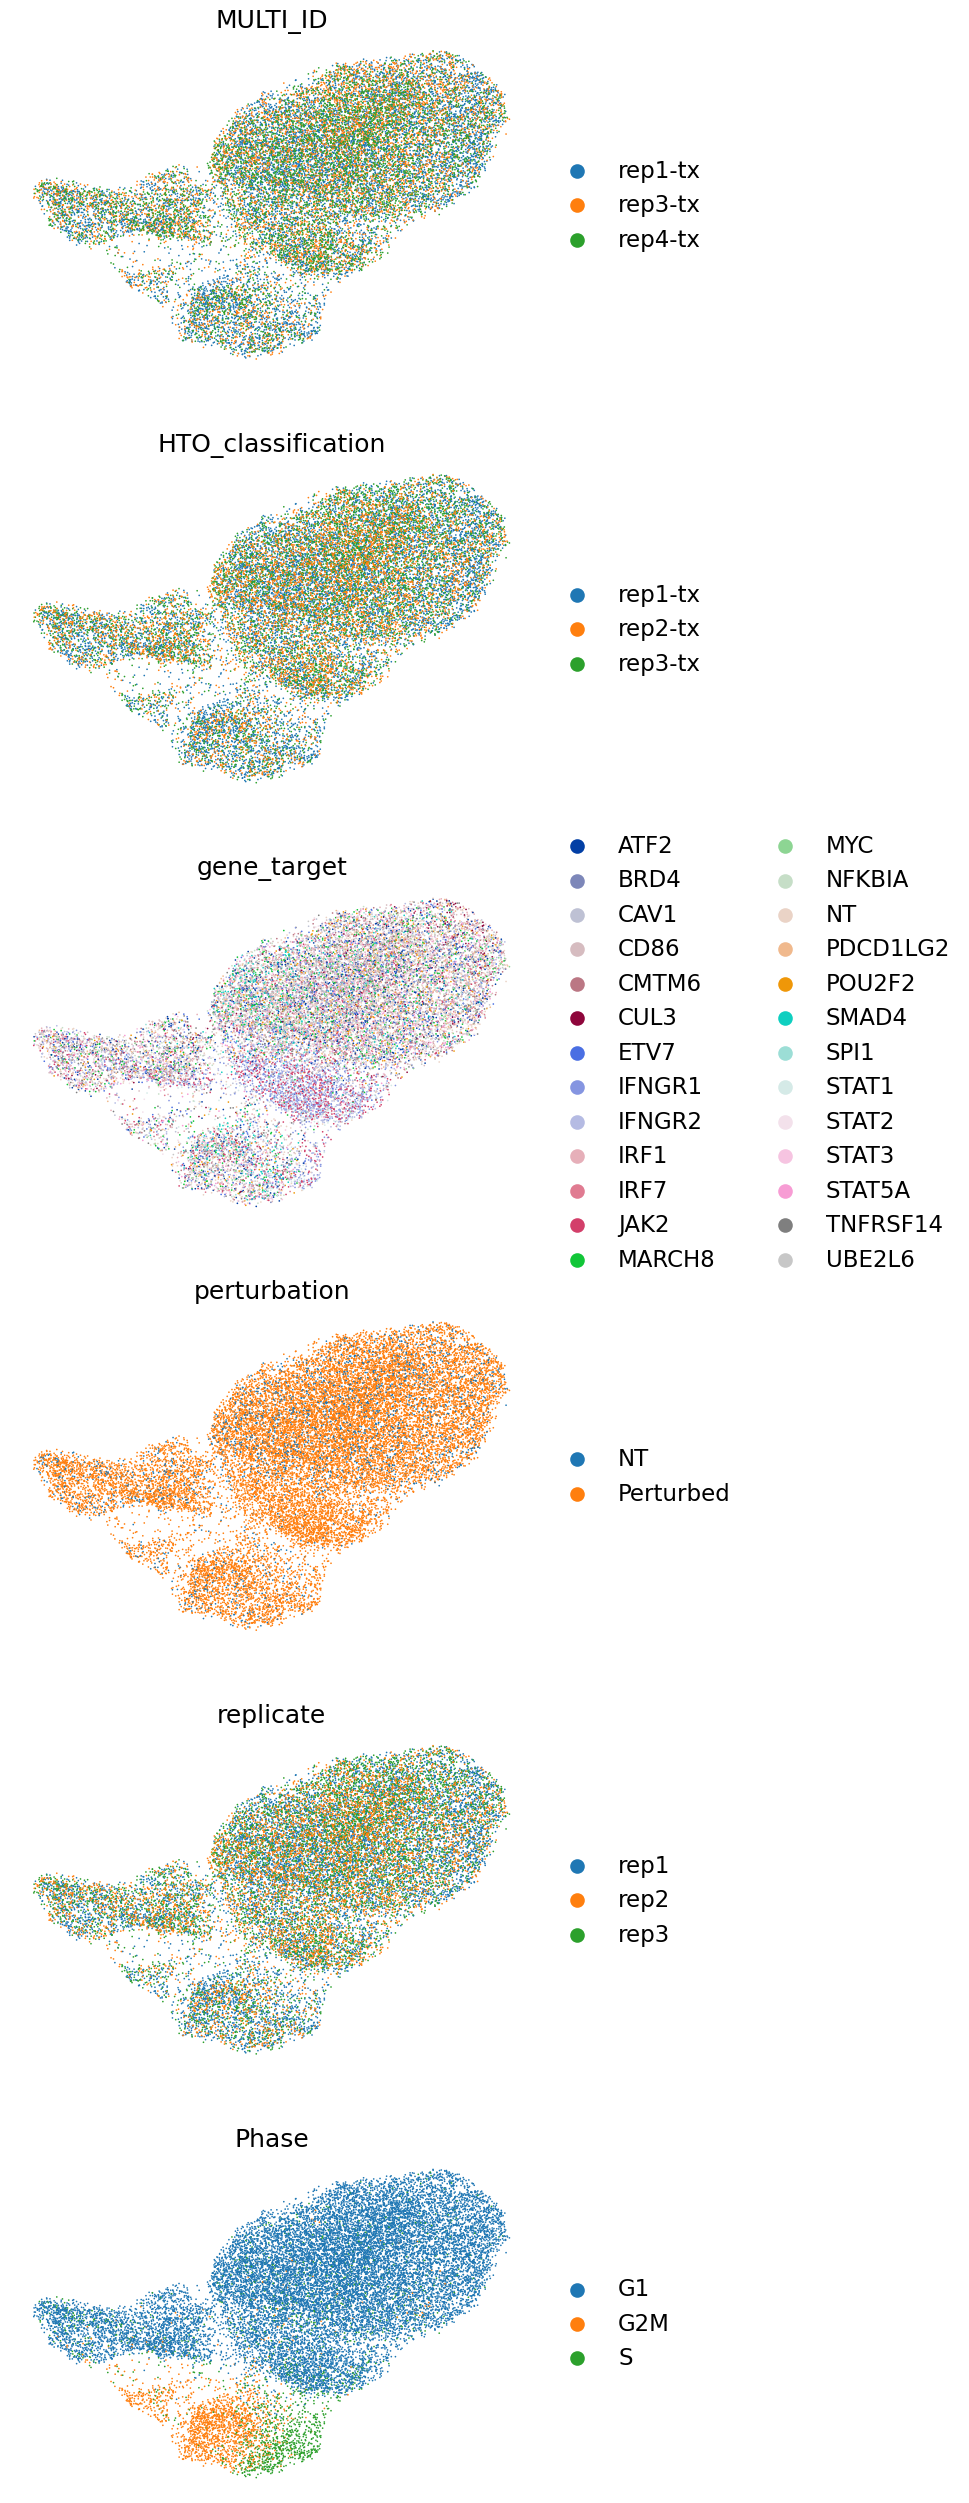

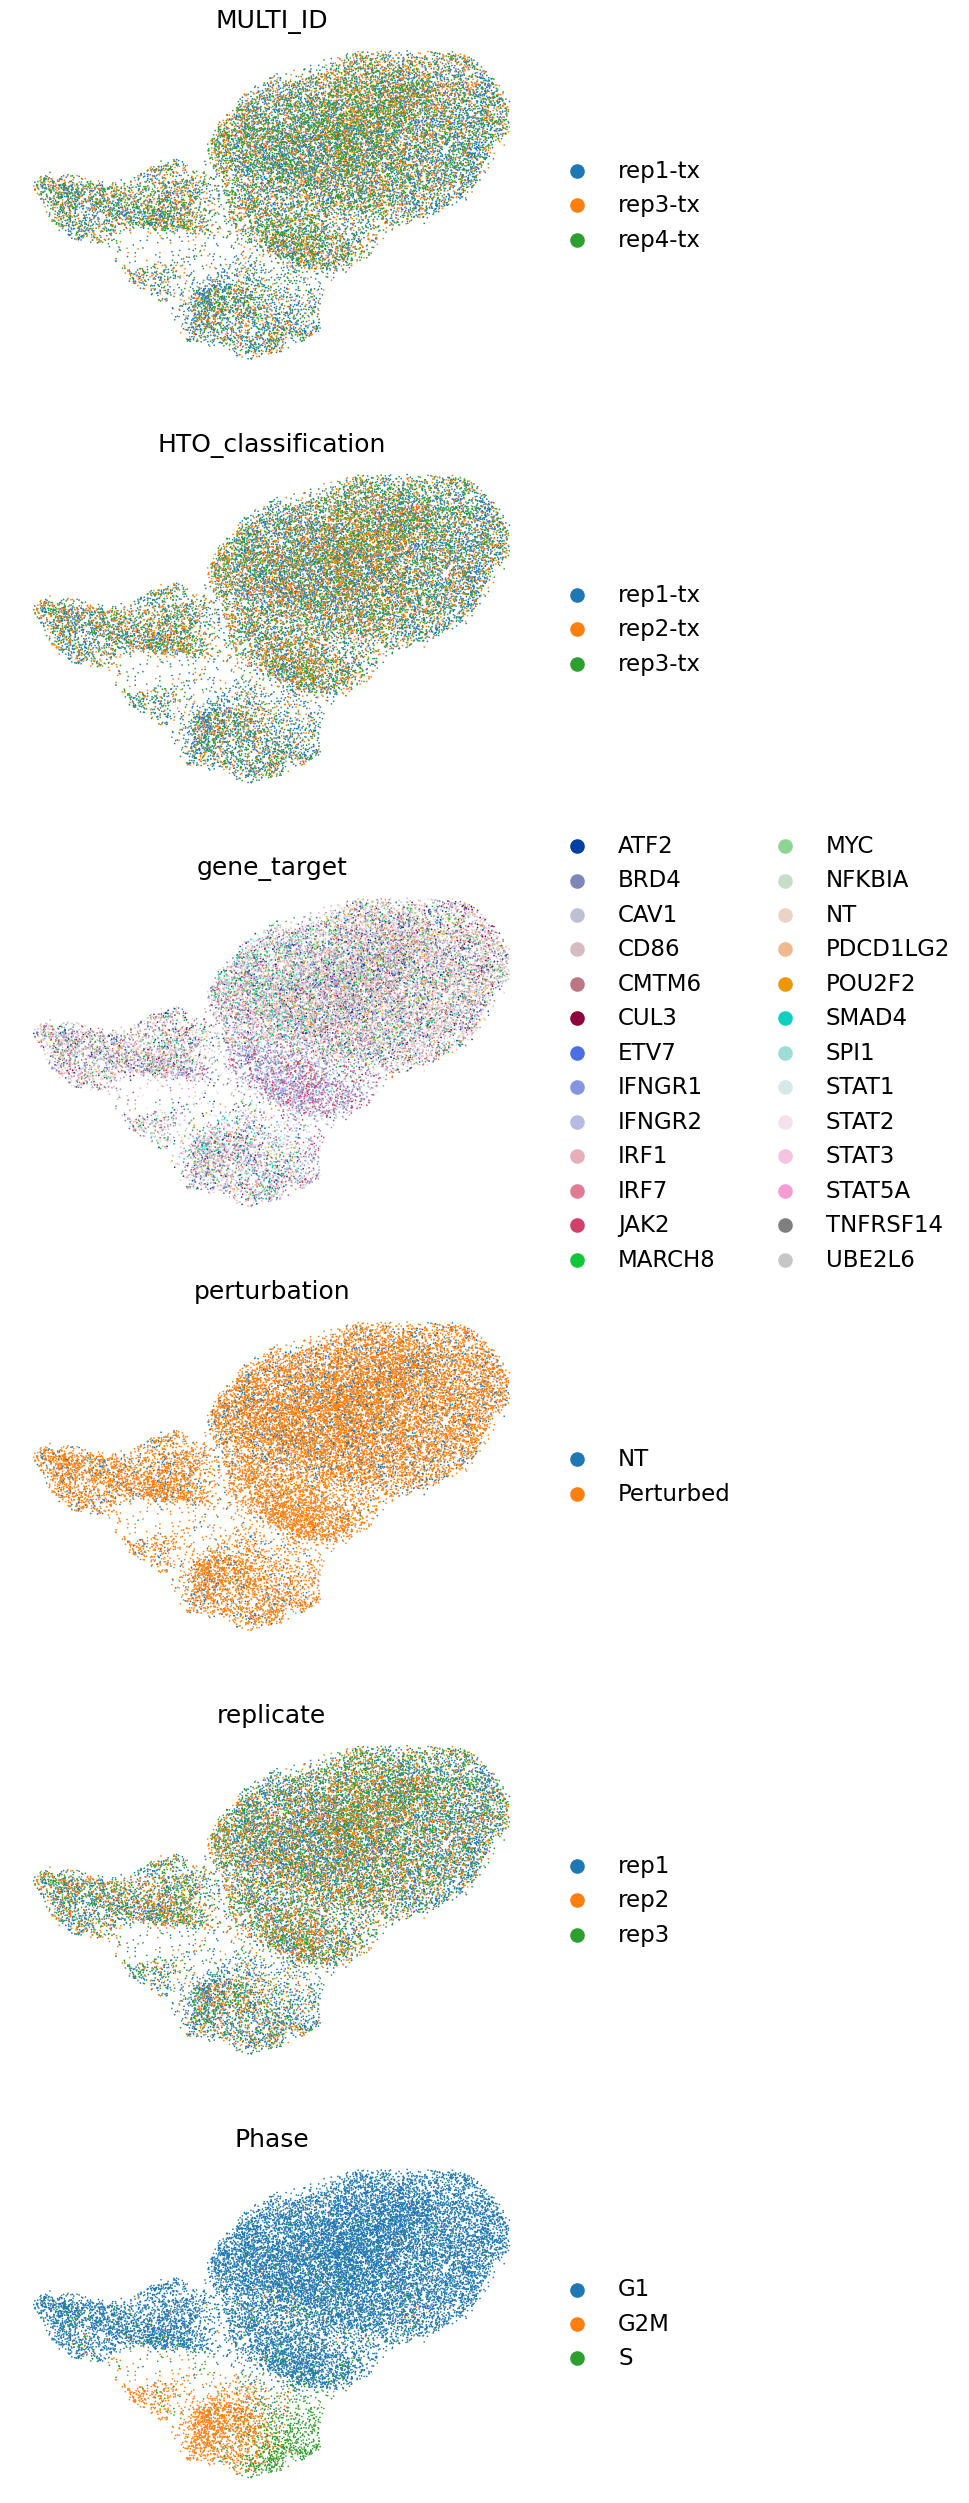

In [10]:
adata1=model.DL_model.adata.copy()
sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=["MULTI_ID","HTO_classification","gene_target","perturbation","replicate","Phase"], frameon=False, ncols=1)

sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=["MULTI_ID","HTO_classification","gene_target","perturbation","replicate","Phase"], frameon=False, ncols=1)

In [11]:
model = NDreamer(adata, condition_key='perturbation', contorl_name='NT', num_hvg=2000, require_batch=False,
                            batch_key=None,
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=10, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./ECCITE_perturbation_nobatch/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./ECCITE_perturbation_nobatch/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)

1
Start data preprocessing
Original adata.obs[perturbation] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'NT': 0, 'Perturbed': 1}
Condition mapping to adata.obs['batch']: {'batch': {0: 0}}
Unique batch mapping: {0: 0}
Calculating the clusters
Unique groups: ['0_NT' '0_Perturbed']


Finished clustering
Data preprocessing done
Remaining number of cells: 20729
Too few epoches (steps, if rigorously speaking). Changing epoch to 178 to adjust for number of cells
Require batch: False
Batch name to number mapping (may be used for search for saved adata):
 {'batch': {0: 0}}
Condition name to number mapping (may be used for search for saved adata):
 {'NT': 0, 'Perturbed': 1}
Preprocessing time: 27.10339 seconds


Overall Progress:   0%|          | 0/178 [00:00<?, ?it/s]

Epoch: 1/178 | All Loss: 97.3176 | Neighborhood Loss: 26.6841 | Triplet Loss: 53.7081 | Reconstruction Loss: 13.4702 | Independent Loss: 11.8003 | KL Loss: 0.3549 | Commitment Loss: 0.5901 | Dependent Loss: -9.2901


Epoch: 2/178 | All Loss: 76.9800 | Neighborhood Loss: 29.8679 | Triplet Loss: 38.0209 | Reconstruction Loss: 6.5183 | Independent Loss: 11.4942 | KL Loss: 0.3487 | Commitment Loss: 0.5863 | Dependent Loss: -9.8565


Epoch: 3/178 | All Loss: 62.4127 | Neighborhood Loss: 31.3144 | Triplet Loss: 25.7254 | Reconstruction Loss: 5.1563 | Independent Loss: 9.5710 | KL Loss: 0.3801 | Commitment Loss: 0.5821 | Dependent Loss: -10.3166


Epoch: 4/178 | All Loss: 54.9099 | Neighborhood Loss: 32.6424 | Triplet Loss: 17.7000 | Reconstruction Loss: 4.8798 | Independent Loss: 9.1897 | KL Loss: 0.3727 | Commitment Loss: 0.5807 | Dependent Loss: -10.4555


Epoch: 5/178 | All Loss: 50.7235 | Neighborhood Loss: 29.5178 | Triplet Loss: 17.3051 | Reconstruction Loss: 4.7025 | Independent Loss: 8.6225 | KL Loss: 0.3509 | Commitment Loss: 0.5784 | Dependent Loss: -10.3537


Epoch: 6/178 | All Loss: 47.7377 | Neighborhood Loss: 29.2027 | Triplet Loss: 15.3496 | Reconstruction Loss: 4.6496 | Independent Loss: 8.2374 | KL Loss: 0.3224 | Commitment Loss: 0.5774 | Dependent Loss: -10.6014


Epoch: 7/178 | All Loss: 38.5732 | Neighborhood Loss: 26.2891 | Triplet Loss: 10.2535 | Reconstruction Loss: 4.5814 | Independent Loss: 7.0406 | KL Loss: 0.2898 | Commitment Loss: 0.5752 | Dependent Loss: -10.4564


Epoch: 8/178 | All Loss: 35.0885 | Neighborhood Loss: 25.2118 | Triplet Loss: 8.2551 | Reconstruction Loss: 4.5258 | Independent Loss: 7.1694 | KL Loss: 0.2650 | Commitment Loss: 0.5782 | Dependent Loss: -10.9168


Epoch: 9/178 | All Loss: 34.7595 | Neighborhood Loss: 24.2123 | Triplet Loss: 9.3536 | Reconstruction Loss: 4.3933 | Independent Loss: 6.7860 | KL Loss: 0.2413 | Commitment Loss: 0.5740 | Dependent Loss: -10.8011


Epoch: 10/178 | All Loss: 31.2049 | Neighborhood Loss: 24.4371 | Triplet Loss: 6.7225 | Reconstruction Loss: 4.3641 | Independent Loss: 5.7820 | KL Loss: 0.2252 | Commitment Loss: 0.5715 | Dependent Loss: -10.8976


Epoch: 11/178 | All Loss: 30.3183 | Neighborhood Loss: 23.0406 | Triplet Loss: 6.7131 | Reconstruction Loss: 4.3440 | Independent Loss: 6.2149 | KL Loss: 0.2096 | Commitment Loss: 0.5707 | Dependent Loss: -10.7746


Epoch: 12/178 | All Loss: 27.9854 | Neighborhood Loss: 22.6369 | Triplet Loss: 5.1792 | Reconstruction Loss: 4.2796 | Independent Loss: 6.0393 | KL Loss: 0.1998 | Commitment Loss: 0.5702 | Dependent Loss: -10.9197


Epoch: 13/178 | All Loss: 29.4779 | Neighborhood Loss: 22.4502 | Triplet Loss: 6.2193 | Reconstruction Loss: 4.2854 | Independent Loss: 6.6926 | KL Loss: 0.1923 | Commitment Loss: 0.5712 | Dependent Loss: -10.9332


Epoch: 14/178 | All Loss: 28.1359 | Neighborhood Loss: 22.9069 | Triplet Loss: 6.1243 | Reconstruction Loss: 4.2467 | Independent Loss: 4.9909 | KL Loss: 0.1854 | Commitment Loss: 0.5734 | Dependent Loss: -10.8917


Resetting 673 unused embeddings.
Resetting 696 unused embeddings.
Resetting 665 unused embeddings.
Resetting 671 unused embeddings.


Resetting 738 unused embeddings.
Resetting 655 unused embeddings.
Resetting 650 unused embeddings.
Resetting 709 unused embeddings.


Resetting 695 unused embeddings.
Resetting 683 unused embeddings.
Resetting 708 unused embeddings.
Resetting 645 unused embeddings.


Resetting 723 unused embeddings.
Resetting 670 unused embeddings.
Resetting 671 unused embeddings.
Resetting 723 unused embeddings.


Resetting 718 unused embeddings.
Resetting 763 unused embeddings.
Resetting 659 unused embeddings.
Resetting 664 unused embeddings.


Resetting 656 unused embeddings.
Resetting 692 unused embeddings.
Resetting 678 unused embeddings.
Resetting 695 unused embeddings.


Resetting 710 unused embeddings.
Resetting 686 unused embeddings.
Resetting 700 unused embeddings.
Resetting 693 unused embeddings.


Resetting 695 unused embeddings.
Resetting 684 unused embeddings.
Resetting 687 unused embeddings.
Resetting 673 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 14
Epoch: 15/178 | All Loss: 13.8658 | Neighborhood Loss: 11.0721 | Triplet Loss: 3.1701 | Reconstruction Loss: 2.1109 | Independent Loss: 2.6802 | KL Loss: 0.0888 | Commitment Loss: 0.2846 | Dependent Loss: -5.5409


Epoch: 16/178 | All Loss: 30.4018 | Neighborhood Loss: 24.5671 | Triplet Loss: 6.6980 | Reconstruction Loss: 4.1793 | Independent Loss: 3.1097 | KL Loss: 0.1458 | Commitment Loss: 0.3714 | Dependent Loss: -8.6695


Epoch: 17/178 | All Loss: 32.8978 | Neighborhood Loss: 24.9376 | Triplet Loss: 8.6428 | Reconstruction Loss: 4.1636 | Independent Loss: 3.5796 | KL Loss: 0.1375 | Commitment Loss: 0.3714 | Dependent Loss: -8.9348


Epoch: 18/178 | All Loss: 34.0794 | Neighborhood Loss: 24.7775 | Triplet Loss: 10.2418 | Reconstruction Loss: 4.1867 | Independent Loss: 3.0742 | KL Loss: 0.1263 | Commitment Loss: 0.3703 | Dependent Loss: -8.6973


Epoch: 19/178 | All Loss: 29.6827 | Neighborhood Loss: 22.7581 | Triplet Loss: 7.8295 | Reconstruction Loss: 4.1719 | Independent Loss: 3.1131 | KL Loss: 0.1176 | Commitment Loss: 0.3687 | Dependent Loss: -8.6762


Epoch: 20/178 | All Loss: 27.9828 | Neighborhood Loss: 22.6231 | Triplet Loss: 7.0182 | Reconstruction Loss: 4.1542 | Independent Loss: 2.5689 | KL Loss: 0.1107 | Commitment Loss: 0.3660 | Dependent Loss: -8.8584


Epoch: 21/178 | All Loss: 26.7064 | Neighborhood Loss: 22.2203 | Triplet Loss: 5.4300 | Reconstruction Loss: 4.1599 | Independent Loss: 3.2368 | KL Loss: 0.1049 | Commitment Loss: 0.3645 | Dependent Loss: -8.8100


Epoch: 22/178 | All Loss: 26.9696 | Neighborhood Loss: 21.2122 | Triplet Loss: 6.8409 | Reconstruction Loss: 4.1002 | Independent Loss: 3.1352 | KL Loss: 0.1037 | Commitment Loss: 0.3714 | Dependent Loss: -8.7938


Epoch: 23/178 | All Loss: 25.9606 | Neighborhood Loss: 21.8390 | Triplet Loss: 5.2153 | Reconstruction Loss: 4.1093 | Independent Loss: 3.2349 | KL Loss: 0.1002 | Commitment Loss: 0.3700 | Dependent Loss: -8.9080


Epoch: 24/178 | All Loss: 24.4926 | Neighborhood Loss: 20.6319 | Triplet Loss: 5.4237 | Reconstruction Loss: 4.1040 | Independent Loss: 2.6097 | KL Loss: 0.0964 | Commitment Loss: 0.3683 | Dependent Loss: -8.7414


Epoch: 25/178 | All Loss: 26.8063 | Neighborhood Loss: 21.9087 | Triplet Loss: 5.7286 | Reconstruction Loss: 4.0956 | Independent Loss: 3.3858 | KL Loss: 0.0928 | Commitment Loss: 0.3651 | Dependent Loss: -8.7703


Epoch: 26/178 | All Loss: 22.7766 | Neighborhood Loss: 19.5964 | Triplet Loss: 4.3031 | Reconstruction Loss: 4.1073 | Independent Loss: 3.3481 | KL Loss: 0.0906 | Commitment Loss: 0.3718 | Dependent Loss: -9.0407


Epoch: 27/178 | All Loss: 25.0571 | Neighborhood Loss: 21.5614 | Triplet Loss: 4.8018 | Reconstruction Loss: 4.0869 | Independent Loss: 2.9712 | KL Loss: 0.0874 | Commitment Loss: 0.3691 | Dependent Loss: -8.8207


Epoch: 28/178 | All Loss: 24.6223 | Neighborhood Loss: 20.4004 | Triplet Loss: 5.1799 | Reconstruction Loss: 4.0747 | Independent Loss: 3.3243 | KL Loss: 0.0837 | Commitment Loss: 0.3667 | Dependent Loss: -8.8076


Epoch: 29/178 | All Loss: 22.9839 | Neighborhood Loss: 19.8936 | Triplet Loss: 4.4509 | Reconstruction Loss: 4.0552 | Independent Loss: 2.9173 | KL Loss: 0.0814 | Commitment Loss: 0.3706 | Dependent Loss: -8.7852


Resetting 701 unused embeddings.
Resetting 716 unused embeddings.
Resetting 702 unused embeddings.
Resetting 722 unused embeddings.


Resetting 716 unused embeddings.
Resetting 683 unused embeddings.
Resetting 673 unused embeddings.
Resetting 734 unused embeddings.


Resetting 701 unused embeddings.
Resetting 699 unused embeddings.
Resetting 724 unused embeddings.
Resetting 707 unused embeddings.


Resetting 705 unused embeddings.
Resetting 688 unused embeddings.
Resetting 684 unused embeddings.
Resetting 730 unused embeddings.


Resetting 747 unused embeddings.
Resetting 728 unused embeddings.
Resetting 700 unused embeddings.
Resetting 709 unused embeddings.


Resetting 710 unused embeddings.
Resetting 717 unused embeddings.
Resetting 702 unused embeddings.
Resetting 701 unused embeddings.


Resetting 730 unused embeddings.
Resetting 686 unused embeddings.
Resetting 727 unused embeddings.
Resetting 682 unused embeddings.


Resetting 748 unused embeddings.
Resetting 693 unused embeddings.
Resetting 702 unused embeddings.
Resetting 718 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 29
Epoch: 30/178 | All Loss: 12.7743 | Neighborhood Loss: 10.4463 | Triplet Loss: 3.1172 | Reconstruction Loss: 2.0545 | Independent Loss: 1.1614 | KL Loss: 0.0397 | Commitment Loss: 0.1841 | Dependent Loss: -4.2290


Epoch: 31/178 | All Loss: 21.2253 | Neighborhood Loss: 19.3897 | Triplet Loss: 3.4068 | Reconstruction Loss: 4.0376 | Independent Loss: 2.9619 | KL Loss: 0.0748 | Commitment Loss: 0.3335 | Dependent Loss: -8.9790


Epoch: 32/178 | All Loss: 22.5688 | Neighborhood Loss: 19.6278 | Triplet Loss: 4.6688 | Reconstruction Loss: 4.0806 | Independent Loss: 2.9338 | KL Loss: 0.0723 | Commitment Loss: 0.3306 | Dependent Loss: -9.1450


Epoch: 33/178 | All Loss: 22.9038 | Neighborhood Loss: 20.4812 | Triplet Loss: 3.9545 | Reconstruction Loss: 4.0444 | Independent Loss: 3.2683 | KL Loss: 0.0701 | Commitment Loss: 0.3345 | Dependent Loss: -9.2491


Epoch: 34/178 | All Loss: 21.3400 | Neighborhood Loss: 19.2879 | Triplet Loss: 4.1126 | Reconstruction Loss: 4.0281 | Independent Loss: 2.5897 | KL Loss: 0.0691 | Commitment Loss: 0.3315 | Dependent Loss: -9.0787


Epoch: 35/178 | All Loss: 21.8321 | Neighborhood Loss: 19.7622 | Triplet Loss: 3.8480 | Reconstruction Loss: 4.0198 | Independent Loss: 2.7975 | KL Loss: 0.0673 | Commitment Loss: 0.3328 | Dependent Loss: -8.9955


Epoch: 36/178 | All Loss: 22.4230 | Neighborhood Loss: 20.0572 | Triplet Loss: 4.1195 | Reconstruction Loss: 4.0131 | Independent Loss: 3.0586 | KL Loss: 0.0646 | Commitment Loss: 0.3333 | Dependent Loss: -9.2234


Epoch: 37/178 | All Loss: 21.0915 | Neighborhood Loss: 18.6282 | Triplet Loss: 4.0094 | Reconstruction Loss: 4.0196 | Independent Loss: 3.0918 | KL Loss: 0.0629 | Commitment Loss: 0.3320 | Dependent Loss: -9.0525


Epoch: 38/178 | All Loss: 19.7668 | Neighborhood Loss: 18.0969 | Triplet Loss: 3.6059 | Reconstruction Loss: 3.9889 | Independent Loss: 2.7949 | KL Loss: 0.0607 | Commitment Loss: 0.3288 | Dependent Loss: -9.1093


Epoch: 39/178 | All Loss: 21.0516 | Neighborhood Loss: 18.3475 | Triplet Loss: 4.3544 | Reconstruction Loss: 3.9760 | Independent Loss: 3.0434 | KL Loss: 0.0607 | Commitment Loss: 0.3291 | Dependent Loss: -9.0595


Epoch: 40/178 | All Loss: 21.6441 | Neighborhood Loss: 19.1286 | Triplet Loss: 4.6944 | Reconstruction Loss: 3.9917 | Independent Loss: 2.6055 | KL Loss: 0.0601 | Commitment Loss: 0.3336 | Dependent Loss: -9.1698


Epoch: 41/178 | All Loss: 20.5916 | Neighborhood Loss: 18.4017 | Triplet Loss: 3.8947 | Reconstruction Loss: 3.9668 | Independent Loss: 3.1909 | KL Loss: 0.0601 | Commitment Loss: 0.3322 | Dependent Loss: -9.2548


Epoch: 42/178 | All Loss: 22.2433 | Neighborhood Loss: 19.3653 | Triplet Loss: 4.2864 | Reconstruction Loss: 4.0242 | Independent Loss: 3.1007 | KL Loss: 0.0588 | Commitment Loss: 0.3301 | Dependent Loss: -8.9222


Epoch: 43/178 | All Loss: 21.3492 | Neighborhood Loss: 19.9200 | Triplet Loss: 3.3637 | Reconstruction Loss: 3.9877 | Independent Loss: 2.7961 | KL Loss: 0.0582 | Commitment Loss: 0.3350 | Dependent Loss: -9.1115


Epoch: 44/178 | All Loss: 19.9931 | Neighborhood Loss: 18.0835 | Triplet Loss: 4.1809 | Reconstruction Loss: 3.9802 | Independent Loss: 2.5035 | KL Loss: 0.0585 | Commitment Loss: 0.3313 | Dependent Loss: -9.1447


Resetting 683 unused embeddings.
Resetting 687 unused embeddings.
Resetting 682 unused embeddings.
Resetting 701 unused embeddings.


Resetting 694 unused embeddings.
Resetting 661 unused embeddings.
Resetting 635 unused embeddings.
Resetting 708 unused embeddings.


Resetting 673 unused embeddings.
Resetting 679 unused embeddings.
Resetting 698 unused embeddings.
Resetting 692 unused embeddings.


Resetting 697 unused embeddings.
Resetting 659 unused embeddings.
Resetting 662 unused embeddings.
Resetting 708 unused embeddings.


Resetting 734 unused embeddings.
Resetting 707 unused embeddings.
Resetting 673 unused embeddings.
Resetting 690 unused embeddings.


Resetting 683 unused embeddings.
Resetting 692 unused embeddings.
Resetting 689 unused embeddings.
Resetting 695 unused embeddings.


Resetting 722 unused embeddings.
Resetting 669 unused embeddings.
Resetting 696 unused embeddings.
Resetting 667 unused embeddings.


Resetting 720 unused embeddings.
Resetting 669 unused embeddings.
Resetting 679 unused embeddings.
Resetting 695 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 44
Epoch: 45/178 | All Loss: 9.5239 | Neighborhood Loss: 8.9213 | Triplet Loss: 1.8250 | Reconstruction Loss: 1.9891 | Independent Loss: 1.1992 | KL Loss: 0.0283 | Commitment Loss: 0.1645 | Dependent Loss: -4.6034


Epoch: 46/178 | All Loss: 19.1624 | Neighborhood Loss: 19.3790 | Triplet Loss: 2.4471 | Reconstruction Loss: 3.9761 | Independent Loss: 2.5077 | KL Loss: 0.0573 | Commitment Loss: 0.3161 | Dependent Loss: -9.5209


Epoch: 47/178 | All Loss: 20.0417 | Neighborhood Loss: 19.0662 | Triplet Loss: 3.3078 | Reconstruction Loss: 3.9516 | Independent Loss: 2.7746 | KL Loss: 0.0559 | Commitment Loss: 0.3140 | Dependent Loss: -9.4285


Epoch: 48/178 | All Loss: 19.4124 | Neighborhood Loss: 18.7992 | Triplet Loss: 2.8137 | Reconstruction Loss: 3.9910 | Independent Loss: 2.7677 | KL Loss: 0.0557 | Commitment Loss: 0.3178 | Dependent Loss: -9.3326


Epoch: 49/178 | All Loss: 19.1994 | Neighborhood Loss: 18.5594 | Triplet Loss: 3.0767 | Reconstruction Loss: 3.9645 | Independent Loss: 2.7514 | KL Loss: 0.0530 | Commitment Loss: 0.3175 | Dependent Loss: -9.5232


Epoch: 50/178 | All Loss: 19.5220 | Neighborhood Loss: 18.8892 | Triplet Loss: 3.3741 | Reconstruction Loss: 3.9272 | Independent Loss: 2.2975 | KL Loss: 0.0525 | Commitment Loss: 0.3166 | Dependent Loss: -9.3351


Epoch: 51/178 | All Loss: 19.1653 | Neighborhood Loss: 18.1945 | Triplet Loss: 3.6043 | Reconstruction Loss: 3.9739 | Independent Loss: 2.4663 | KL Loss: 0.0520 | Commitment Loss: 0.3156 | Dependent Loss: -9.4412


Epoch: 52/178 | All Loss: 19.3391 | Neighborhood Loss: 18.3845 | Triplet Loss: 3.4632 | Reconstruction Loss: 3.9970 | Independent Loss: 2.7057 | KL Loss: 0.0525 | Commitment Loss: 0.3145 | Dependent Loss: -9.5784


Epoch: 53/178 | All Loss: 19.2310 | Neighborhood Loss: 18.8805 | Triplet Loss: 3.0918 | Reconstruction Loss: 3.9679 | Independent Loss: 2.4507 | KL Loss: 0.0535 | Commitment Loss: 0.3168 | Dependent Loss: -9.5302


Epoch: 54/178 | All Loss: 18.9583 | Neighborhood Loss: 18.4824 | Triplet Loss: 3.5105 | Reconstruction Loss: 3.9653 | Independent Loss: 2.0838 | KL Loss: 0.0534 | Commitment Loss: 0.3147 | Dependent Loss: -9.4519


Epoch: 55/178 | All Loss: 18.9349 | Neighborhood Loss: 17.6624 | Triplet Loss: 3.0648 | Reconstruction Loss: 3.9441 | Independent Loss: 3.2665 | KL Loss: 0.0532 | Commitment Loss: 0.3144 | Dependent Loss: -9.3704


Epoch: 56/178 | All Loss: 20.0619 | Neighborhood Loss: 18.8633 | Triplet Loss: 3.6506 | Reconstruction Loss: 3.9326 | Independent Loss: 2.8108 | KL Loss: 0.0534 | Commitment Loss: 0.3186 | Dependent Loss: -9.5674


Epoch: 57/178 | All Loss: 18.4800 | Neighborhood Loss: 18.3650 | Triplet Loss: 2.7263 | Reconstruction Loss: 3.9223 | Independent Loss: 2.6863 | KL Loss: 0.0523 | Commitment Loss: 0.3189 | Dependent Loss: -9.5912


Epoch: 58/178 | All Loss: 19.9021 | Neighborhood Loss: 18.8304 | Triplet Loss: 3.0182 | Reconstruction Loss: 3.9667 | Independent Loss: 3.2880 | KL Loss: 0.0508 | Commitment Loss: 0.3187 | Dependent Loss: -9.5708


Epoch: 59/178 | All Loss: 19.5471 | Neighborhood Loss: 19.1577 | Triplet Loss: 2.6824 | Reconstruction Loss: 3.9429 | Independent Loss: 2.8717 | KL Loss: 0.0503 | Commitment Loss: 0.3144 | Dependent Loss: -9.4724


Resetting 671 unused embeddings.
Resetting 692 unused embeddings.
Resetting 683 unused embeddings.
Resetting 700 unused embeddings.


Resetting 690 unused embeddings.
Resetting 658 unused embeddings.
Resetting 638 unused embeddings.
Resetting 694 unused embeddings.


Resetting 673 unused embeddings.
Resetting 683 unused embeddings.
Resetting 693 unused embeddings.
Resetting 695 unused embeddings.


Resetting 696 unused embeddings.
Resetting 658 unused embeddings.
Resetting 666 unused embeddings.
Resetting 714 unused embeddings.


Resetting 731 unused embeddings.
Resetting 701 unused embeddings.
Resetting 661 unused embeddings.
Resetting 684 unused embeddings.


Resetting 681 unused embeddings.
Resetting 686 unused embeddings.
Resetting 678 unused embeddings.
Resetting 692 unused embeddings.


Resetting 724 unused embeddings.
Resetting 670 unused embeddings.
Resetting 695 unused embeddings.
Resetting 658 unused embeddings.


Resetting 700 unused embeddings.
Resetting 674 unused embeddings.
Resetting 683 unused embeddings.
Resetting 682 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 59
Epoch: 60/178 | All Loss: 9.5944 | Neighborhood Loss: 9.6330 | Triplet Loss: 1.3736 | Reconstruction Loss: 1.9641 | Independent Loss: 1.1639 | KL Loss: 0.0246 | Commitment Loss: 0.1592 | Dependent Loss: -4.7240


Epoch: 61/178 | All Loss: 18.7921 | Neighborhood Loss: 17.7592 | Triplet Loss: 4.1199 | Reconstruction Loss: 3.9459 | Independent Loss: 2.0529 | KL Loss: 0.0481 | Commitment Loss: 0.3106 | Dependent Loss: -9.4445


Epoch: 62/178 | All Loss: 19.5710 | Neighborhood Loss: 19.4763 | Triplet Loss: 3.1402 | Reconstruction Loss: 3.9244 | Independent Loss: 2.2872 | KL Loss: 0.0466 | Commitment Loss: 0.3118 | Dependent Loss: -9.6154


Epoch: 63/178 | All Loss: 18.9958 | Neighborhood Loss: 18.5401 | Triplet Loss: 2.7935 | Reconstruction Loss: 3.9587 | Independent Loss: 2.8768 | KL Loss: 0.0470 | Commitment Loss: 0.3095 | Dependent Loss: -9.5299


Epoch: 64/178 | All Loss: 18.3618 | Neighborhood Loss: 18.0505 | Triplet Loss: 2.9616 | Reconstruction Loss: 3.9730 | Independent Loss: 2.6218 | KL Loss: 0.0480 | Commitment Loss: 0.3085 | Dependent Loss: -9.6017


Epoch: 65/178 | All Loss: 17.9265 | Neighborhood Loss: 18.0230 | Triplet Loss: 2.9273 | Reconstruction Loss: 3.9709 | Independent Loss: 2.3379 | KL Loss: 0.0475 | Commitment Loss: 0.3093 | Dependent Loss: -9.6895


Epoch: 66/178 | All Loss: 17.3322 | Neighborhood Loss: 17.3281 | Triplet Loss: 3.2035 | Reconstruction Loss: 3.9106 | Independent Loss: 2.1490 | KL Loss: 0.0468 | Commitment Loss: 0.3095 | Dependent Loss: -9.6152


Epoch: 67/178 | All Loss: 18.9459 | Neighborhood Loss: 18.8165 | Triplet Loss: 2.8792 | Reconstruction Loss: 3.9861 | Independent Loss: 2.5466 | KL Loss: 0.0456 | Commitment Loss: 0.3110 | Dependent Loss: -9.6391


Epoch: 68/178 | All Loss: 18.8041 | Neighborhood Loss: 18.4018 | Triplet Loss: 3.1383 | Reconstruction Loss: 3.9829 | Independent Loss: 2.6021 | KL Loss: 0.0458 | Commitment Loss: 0.3086 | Dependent Loss: -9.6755


Epoch: 69/178 | All Loss: 19.6751 | Neighborhood Loss: 18.9161 | Triplet Loss: 3.3596 | Reconstruction Loss: 3.9778 | Independent Loss: 2.6933 | KL Loss: 0.0453 | Commitment Loss: 0.3089 | Dependent Loss: -9.6260


Epoch: 70/178 | All Loss: 18.8597 | Neighborhood Loss: 18.6217 | Triplet Loss: 2.9791 | Reconstruction Loss: 3.9615 | Independent Loss: 2.5203 | KL Loss: 0.0451 | Commitment Loss: 0.3069 | Dependent Loss: -9.5749


Epoch: 71/178 | All Loss: 17.7821 | Neighborhood Loss: 17.8939 | Triplet Loss: 2.8539 | Reconstruction Loss: 3.9522 | Independent Loss: 2.4859 | KL Loss: 0.0448 | Commitment Loss: 0.3065 | Dependent Loss: -9.7552


Epoch: 72/178 | All Loss: 18.8435 | Neighborhood Loss: 17.7651 | Triplet Loss: 3.7341 | Reconstruction Loss: 3.9631 | Independent Loss: 2.7203 | KL Loss: 0.0442 | Commitment Loss: 0.3084 | Dependent Loss: -9.6916


Epoch: 73/178 | All Loss: 18.9276 | Neighborhood Loss: 18.6306 | Triplet Loss: 3.1101 | Reconstruction Loss: 3.9745 | Independent Loss: 2.5306 | KL Loss: 0.0444 | Commitment Loss: 0.3092 | Dependent Loss: -9.6718


Epoch: 74/178 | All Loss: 17.8161 | Neighborhood Loss: 17.5911 | Triplet Loss: 2.9997 | Reconstruction Loss: 3.9469 | Independent Loss: 2.7755 | KL Loss: 0.0447 | Commitment Loss: 0.3087 | Dependent Loss: -9.8505


Resetting 674 unused embeddings.
Resetting 700 unused embeddings.
Resetting 677 unused embeddings.
Resetting 696 unused embeddings.


Resetting 700 unused embeddings.
Resetting 662 unused embeddings.
Resetting 642 unused embeddings.
Resetting 697 unused embeddings.


Resetting 675 unused embeddings.
Resetting 677 unused embeddings.
Resetting 691 unused embeddings.
Resetting 696 unused embeddings.


Resetting 699 unused embeddings.
Resetting 665 unused embeddings.
Resetting 666 unused embeddings.
Resetting 714 unused embeddings.


Resetting 732 unused embeddings.
Resetting 702 unused embeddings.
Resetting 657 unused embeddings.
Resetting 688 unused embeddings.


Resetting 680 unused embeddings.
Resetting 685 unused embeddings.
Resetting 678 unused embeddings.
Resetting 692 unused embeddings.


Resetting 725 unused embeddings.
Resetting 671 unused embeddings.
Resetting 685 unused embeddings.
Resetting 658 unused embeddings.


Resetting 693 unused embeddings.
Resetting 678 unused embeddings.
Resetting 683 unused embeddings.
Resetting 679 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 74
Epoch: 75/178 | All Loss: 9.2601 | Neighborhood Loss: 9.0731 | Triplet Loss: 1.5160 | Reconstruction Loss: 1.9617 | Independent Loss: 1.2962 | KL Loss: 0.0223 | Commitment Loss: 0.1513 | Dependent Loss: -4.7605


Epoch: 76/178 | All Loss: 17.5511 | Neighborhood Loss: 17.9273 | Triplet Loss: 2.8634 | Reconstruction Loss: 3.9319 | Independent Loss: 2.2901 | KL Loss: 0.0447 | Commitment Loss: 0.3034 | Dependent Loss: -9.8097


Epoch: 77/178 | All Loss: 16.4753 | Neighborhood Loss: 17.6418 | Triplet Loss: 2.0294 | Reconstruction Loss: 3.9068 | Independent Loss: 2.3219 | KL Loss: 0.0448 | Commitment Loss: 0.3028 | Dependent Loss: -9.7724


Epoch: 78/178 | All Loss: 17.5475 | Neighborhood Loss: 17.9230 | Triplet Loss: 2.8664 | Reconstruction Loss: 3.9114 | Independent Loss: 2.3303 | KL Loss: 0.0455 | Commitment Loss: 0.3040 | Dependent Loss: -9.8331


Epoch: 79/178 | All Loss: 17.6256 | Neighborhood Loss: 17.8114 | Triplet Loss: 2.7314 | Reconstruction Loss: 3.9473 | Independent Loss: 2.7582 | KL Loss: 0.0451 | Commitment Loss: 0.3010 | Dependent Loss: -9.9687


Epoch: 80/178 | All Loss: 16.8109 | Neighborhood Loss: 17.8493 | Triplet Loss: 2.6862 | Reconstruction Loss: 3.9166 | Independent Loss: 1.9946 | KL Loss: 0.0444 | Commitment Loss: 0.3030 | Dependent Loss: -9.9833


Epoch: 81/178 | All Loss: 17.4503 | Neighborhood Loss: 17.4627 | Triplet Loss: 3.1377 | Reconstruction Loss: 3.9314 | Independent Loss: 2.4525 | KL Loss: 0.0431 | Commitment Loss: 0.3023 | Dependent Loss: -9.8794


Epoch: 82/178 | All Loss: 19.0159 | Neighborhood Loss: 18.8213 | Triplet Loss: 3.1003 | Reconstruction Loss: 3.9449 | Independent Loss: 2.6808 | KL Loss: 0.0427 | Commitment Loss: 0.3023 | Dependent Loss: -9.8764


Epoch: 83/178 | All Loss: 17.9160 | Neighborhood Loss: 18.3706 | Triplet Loss: 2.6883 | Reconstruction Loss: 3.9206 | Independent Loss: 2.4861 | KL Loss: 0.0420 | Commitment Loss: 0.3062 | Dependent Loss: -9.8976


Epoch: 84/178 | All Loss: 16.9114 | Neighborhood Loss: 17.8423 | Triplet Loss: 2.2136 | Reconstruction Loss: 3.9423 | Independent Loss: 2.5076 | KL Loss: 0.0420 | Commitment Loss: 0.3035 | Dependent Loss: -9.9398


Epoch: 85/178 | All Loss: 17.3488 | Neighborhood Loss: 18.1094 | Triplet Loss: 2.2262 | Reconstruction Loss: 3.9487 | Independent Loss: 2.6579 | KL Loss: 0.0419 | Commitment Loss: 0.3062 | Dependent Loss: -9.9414


Epoch: 86/178 | All Loss: 17.5699 | Neighborhood Loss: 18.2121 | Triplet Loss: 2.4375 | Reconstruction Loss: 3.9532 | Independent Loss: 2.6733 | KL Loss: 0.0425 | Commitment Loss: 0.3060 | Dependent Loss: -10.0548


Epoch: 87/178 | All Loss: 17.0750 | Neighborhood Loss: 17.8658 | Triplet Loss: 2.7979 | Reconstruction Loss: 3.9301 | Independent Loss: 2.1744 | KL Loss: 0.0426 | Commitment Loss: 0.3057 | Dependent Loss: -10.0416


Epoch: 88/178 | All Loss: 18.0396 | Neighborhood Loss: 17.8245 | Triplet Loss: 3.6726 | Reconstruction Loss: 3.9193 | Independent Loss: 2.1762 | KL Loss: 0.0420 | Commitment Loss: 0.3046 | Dependent Loss: -9.8996


Epoch: 89/178 | All Loss: 17.2355 | Neighborhood Loss: 17.3774 | Triplet Loss: 2.9830 | Reconstruction Loss: 3.9321 | Independent Loss: 2.6697 | KL Loss: 0.0429 | Commitment Loss: 0.3058 | Dependent Loss: -10.0754


Resetting 676 unused embeddings.
Resetting 700 unused embeddings.
Resetting 669 unused embeddings.
Resetting 698 unused embeddings.


Resetting 696 unused embeddings.
Resetting 661 unused embeddings.
Resetting 636 unused embeddings.
Resetting 695 unused embeddings.


Resetting 679 unused embeddings.
Resetting 684 unused embeddings.
Resetting 694 unused embeddings.
Resetting 704 unused embeddings.


Resetting 701 unused embeddings.
Resetting 666 unused embeddings.
Resetting 678 unused embeddings.
Resetting 720 unused embeddings.


Resetting 731 unused embeddings.
Resetting 700 unused embeddings.
Resetting 660 unused embeddings.
Resetting 689 unused embeddings.


Resetting 675 unused embeddings.
Resetting 677 unused embeddings.
Resetting 675 unused embeddings.
Resetting 692 unused embeddings.


Resetting 725 unused embeddings.
Resetting 679 unused embeddings.
Resetting 680 unused embeddings.
Resetting 663 unused embeddings.


Resetting 681 unused embeddings.
Resetting 684 unused embeddings.
Resetting 682 unused embeddings.
Resetting 678 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 89
Epoch: 90/178 | All Loss: 8.2708 | Neighborhood Loss: 8.5198 | Triplet Loss: 1.1735 | Reconstruction Loss: 1.9448 | Independent Loss: 1.4740 | KL Loss: 0.0216 | Commitment Loss: 0.1524 | Dependent Loss: -5.0155


Epoch: 91/178 | All Loss: 17.3729 | Neighborhood Loss: 18.2791 | Triplet Loss: 2.7082 | Reconstruction Loss: 3.9144 | Independent Loss: 2.2443 | KL Loss: 0.0439 | Commitment Loss: 0.2962 | Dependent Loss: -10.1132


Epoch: 92/178 | All Loss: 16.2379 | Neighborhood Loss: 17.6770 | Triplet Loss: 2.0167 | Reconstruction Loss: 3.9028 | Independent Loss: 2.5117 | KL Loss: 0.0440 | Commitment Loss: 0.2979 | Dependent Loss: -10.2123


Epoch: 93/178 | All Loss: 17.9823 | Neighborhood Loss: 18.0644 | Triplet Loss: 2.7709 | Reconstruction Loss: 3.8926 | Independent Loss: 3.1355 | KL Loss: 0.0434 | Commitment Loss: 0.2950 | Dependent Loss: -10.2194


Epoch: 94/178 | All Loss: 16.1338 | Neighborhood Loss: 16.4701 | Triplet Loss: 3.1650 | Reconstruction Loss: 3.9177 | Independent Loss: 2.4239 | KL Loss: 0.0427 | Commitment Loss: 0.2984 | Dependent Loss: -10.1841


Epoch: 95/178 | All Loss: 16.1533 | Neighborhood Loss: 17.6081 | Triplet Loss: 2.1507 | Reconstruction Loss: 3.9134 | Independent Loss: 2.3894 | KL Loss: 0.0417 | Commitment Loss: 0.2957 | Dependent Loss: -10.2459


Epoch: 96/178 | All Loss: 17.9936 | Neighborhood Loss: 17.5584 | Triplet Loss: 4.0244 | Reconstruction Loss: 3.9379 | Independent Loss: 2.2285 | KL Loss: 0.0426 | Commitment Loss: 0.2967 | Dependent Loss: -10.0950


Epoch: 97/178 | All Loss: 15.1139 | Neighborhood Loss: 16.3204 | Triplet Loss: 2.3635 | Reconstruction Loss: 3.9198 | Independent Loss: 2.3525 | KL Loss: 0.0433 | Commitment Loss: 0.2947 | Dependent Loss: -10.1803


Epoch: 98/178 | All Loss: 16.9011 | Neighborhood Loss: 17.4163 | Triplet Loss: 3.2687 | Reconstruction Loss: 3.9059 | Independent Loss: 2.0834 | KL Loss: 0.0439 | Commitment Loss: 0.2984 | Dependent Loss: -10.1154


Epoch: 99/178 | All Loss: 17.1130 | Neighborhood Loss: 17.4985 | Triplet Loss: 3.0410 | Reconstruction Loss: 3.8869 | Independent Loss: 2.6118 | KL Loss: 0.0438 | Commitment Loss: 0.2953 | Dependent Loss: -10.2643


Epoch: 100/178 | All Loss: 16.4723 | Neighborhood Loss: 18.0531 | Triplet Loss: 2.0619 | Reconstruction Loss: 3.9009 | Independent Loss: 2.3637 | KL Loss: 0.0427 | Commitment Loss: 0.2961 | Dependent Loss: -10.2461


Epoch: 101/178 | All Loss: 17.0874 | Neighborhood Loss: 17.6932 | Triplet Loss: 2.4634 | Reconstruction Loss: 3.8896 | Independent Loss: 2.8132 | KL Loss: 0.0428 | Commitment Loss: 0.2997 | Dependent Loss: -10.1145


Epoch: 102/178 | All Loss: 16.8635 | Neighborhood Loss: 17.6993 | Triplet Loss: 2.7420 | Reconstruction Loss: 3.8909 | Independent Loss: 2.4021 | KL Loss: 0.0428 | Commitment Loss: 0.3008 | Dependent Loss: -10.2144


Epoch: 103/178 | All Loss: 16.5500 | Neighborhood Loss: 17.4201 | Triplet Loss: 2.9980 | Reconstruction Loss: 3.9291 | Independent Loss: 2.1197 | KL Loss: 0.0426 | Commitment Loss: 0.2980 | Dependent Loss: -10.2576


Epoch: 104/178 | All Loss: 16.9076 | Neighborhood Loss: 17.6268 | Triplet Loss: 2.4128 | Reconstruction Loss: 3.9110 | Independent Loss: 2.8447 | KL Loss: 0.0428 | Commitment Loss: 0.2998 | Dependent Loss: -10.2302


Resetting 674 unused embeddings.
Resetting 705 unused embeddings.
Resetting 666 unused embeddings.
Resetting 702 unused embeddings.


Resetting 698 unused embeddings.
Resetting 669 unused embeddings.
Resetting 645 unused embeddings.
Resetting 698 unused embeddings.


Resetting 679 unused embeddings.
Resetting 676 unused embeddings.
Resetting 689 unused embeddings.
Resetting 701 unused embeddings.


Resetting 702 unused embeddings.
Resetting 668 unused embeddings.
Resetting 683 unused embeddings.
Resetting 727 unused embeddings.


Resetting 731 unused embeddings.
Resetting 701 unused embeddings.
Resetting 663 unused embeddings.
Resetting 689 unused embeddings.


Resetting 675 unused embeddings.
Resetting 675 unused embeddings.
Resetting 672 unused embeddings.
Resetting 689 unused embeddings.


Resetting 726 unused embeddings.
Resetting 680 unused embeddings.
Resetting 676 unused embeddings.
Resetting 667 unused embeddings.


Resetting 682 unused embeddings.
Resetting 691 unused embeddings.
Resetting 686 unused embeddings.
Resetting 675 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 104
Epoch: 105/178 | All Loss: 8.9117 | Neighborhood Loss: 9.1936 | Triplet Loss: 1.5657 | Reconstruction Loss: 1.9406 | Independent Loss: 1.1045 | KL Loss: 0.0217 | Commitment Loss: 0.1511 | Dependent Loss: -5.0654


Epoch: 106/178 | All Loss: 16.8557 | Neighborhood Loss: 17.6842 | Triplet Loss: 2.7807 | Reconstruction Loss: 3.9043 | Independent Loss: 2.5598 | KL Loss: 0.0435 | Commitment Loss: 0.2914 | Dependent Loss: -10.4082


Epoch: 107/178 | All Loss: 16.1974 | Neighborhood Loss: 17.8712 | Triplet Loss: 2.2456 | Reconstruction Loss: 3.8855 | Independent Loss: 2.0463 | KL Loss: 0.0426 | Commitment Loss: 0.2915 | Dependent Loss: -10.1853


Epoch: 108/178 | All Loss: 16.1529 | Neighborhood Loss: 17.6387 | Triplet Loss: 2.5320 | Reconstruction Loss: 3.9138 | Independent Loss: 2.1180 | KL Loss: 0.0427 | Commitment Loss: 0.2940 | Dependent Loss: -10.3862


Epoch: 109/178 | All Loss: 16.1695 | Neighborhood Loss: 17.1616 | Triplet Loss: 2.5256 | Reconstruction Loss: 3.9191 | Independent Loss: 2.5963 | KL Loss: 0.0416 | Commitment Loss: 0.2945 | Dependent Loss: -10.3690


Epoch: 110/178 | All Loss: 17.2857 | Neighborhood Loss: 18.3480 | Triplet Loss: 2.8261 | Reconstruction Loss: 3.8754 | Independent Loss: 2.2528 | KL Loss: 0.0417 | Commitment Loss: 0.2958 | Dependent Loss: -10.3541


Epoch: 111/178 | All Loss: 17.1704 | Neighborhood Loss: 17.6487 | Triplet Loss: 3.1059 | Reconstruction Loss: 3.9487 | Independent Loss: 2.4952 | KL Loss: 0.0416 | Commitment Loss: 0.2942 | Dependent Loss: -10.3640


Epoch: 112/178 | All Loss: 16.7410 | Neighborhood Loss: 17.3302 | Triplet Loss: 3.1059 | Reconstruction Loss: 3.8933 | Independent Loss: 2.4101 | KL Loss: 0.0423 | Commitment Loss: 0.2950 | Dependent Loss: -10.3359


Epoch: 113/178 | All Loss: 16.4734 | Neighborhood Loss: 18.1262 | Triplet Loss: 2.4011 | Reconstruction Loss: 3.9059 | Independent Loss: 2.2105 | KL Loss: 0.0431 | Commitment Loss: 0.2942 | Dependent Loss: -10.5074


Epoch: 114/178 | All Loss: 17.2026 | Neighborhood Loss: 18.7332 | Triplet Loss: 2.0726 | Reconstruction Loss: 3.9279 | Independent Loss: 2.4755 | KL Loss: 0.0428 | Commitment Loss: 0.2964 | Dependent Loss: -10.3458


Epoch: 115/178 | All Loss: 15.5412 | Neighborhood Loss: 17.1233 | Triplet Loss: 2.4909 | Reconstruction Loss: 3.9334 | Independent Loss: 2.1497 | KL Loss: 0.0422 | Commitment Loss: 0.2893 | Dependent Loss: -10.4875


Epoch: 116/178 | All Loss: 15.9021 | Neighborhood Loss: 16.6464 | Triplet Loss: 2.8467 | Reconstruction Loss: 3.9551 | Independent Loss: 2.6525 | KL Loss: 0.0420 | Commitment Loss: 0.2959 | Dependent Loss: -10.5365


Epoch: 117/178 | All Loss: 15.7544 | Neighborhood Loss: 16.8571 | Triplet Loss: 2.3943 | Reconstruction Loss: 3.8898 | Independent Loss: 2.6100 | KL Loss: 0.0407 | Commitment Loss: 0.2933 | Dependent Loss: -10.3309


Epoch: 118/178 | All Loss: 15.5161 | Neighborhood Loss: 17.5709 | Triplet Loss: 1.6848 | Reconstruction Loss: 3.9295 | Independent Loss: 2.4922 | KL Loss: 0.0412 | Commitment Loss: 0.2935 | Dependent Loss: -10.4960


Epoch: 119/178 | All Loss: 16.0069 | Neighborhood Loss: 17.3110 | Triplet Loss: 2.5761 | Reconstruction Loss: 3.8920 | Independent Loss: 2.2721 | KL Loss: 0.0414 | Commitment Loss: 0.2936 | Dependent Loss: -10.3792


Resetting 678 unused embeddings.
Resetting 713 unused embeddings.
Resetting 671 unused embeddings.
Resetting 703 unused embeddings.


Resetting 700 unused embeddings.
Resetting 671 unused embeddings.
Resetting 647 unused embeddings.
Resetting 701 unused embeddings.


Resetting 684 unused embeddings.
Resetting 673 unused embeddings.
Resetting 690 unused embeddings.
Resetting 705 unused embeddings.


Resetting 707 unused embeddings.
Resetting 673 unused embeddings.
Resetting 690 unused embeddings.
Resetting 730 unused embeddings.


Resetting 732 unused embeddings.
Resetting 703 unused embeddings.
Resetting 669 unused embeddings.
Resetting 688 unused embeddings.


Resetting 667 unused embeddings.
Resetting 674 unused embeddings.
Resetting 675 unused embeddings.
Resetting 694 unused embeddings.


Resetting 726 unused embeddings.
Resetting 685 unused embeddings.
Resetting 676 unused embeddings.
Resetting 671 unused embeddings.


Resetting 680 unused embeddings.
Resetting 694 unused embeddings.
Resetting 689 unused embeddings.
Resetting 681 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 119
Epoch: 120/178 | All Loss: 7.8247 | Neighborhood Loss: 8.3702 | Triplet Loss: 1.2853 | Reconstruction Loss: 1.9762 | Independent Loss: 1.1478 | KL Loss: 0.0211 | Commitment Loss: 0.1454 | Dependent Loss: -5.1212


Epoch: 121/178 | All Loss: 15.9811 | Neighborhood Loss: 17.7575 | Triplet Loss: 1.8769 | Reconstruction Loss: 3.9047 | Independent Loss: 2.8612 | KL Loss: 0.0425 | Commitment Loss: 0.2872 | Dependent Loss: -10.7488


Epoch: 122/178 | All Loss: 15.3448 | Neighborhood Loss: 17.3764 | Triplet Loss: 2.0859 | Reconstruction Loss: 3.9162 | Independent Loss: 2.4147 | KL Loss: 0.0419 | Commitment Loss: 0.2868 | Dependent Loss: -10.7770


Epoch: 123/178 | All Loss: 15.0531 | Neighborhood Loss: 16.9692 | Triplet Loss: 2.3416 | Reconstruction Loss: 3.8878 | Independent Loss: 2.1442 | KL Loss: 0.0415 | Commitment Loss: 0.2897 | Dependent Loss: -10.6209


Epoch: 124/178 | All Loss: 15.2828 | Neighborhood Loss: 16.5499 | Triplet Loss: 2.9975 | Reconstruction Loss: 3.9219 | Independent Loss: 2.1464 | KL Loss: 0.0412 | Commitment Loss: 0.2885 | Dependent Loss: -10.6626


Epoch: 125/178 | All Loss: 16.5376 | Neighborhood Loss: 17.5775 | Triplet Loss: 2.8167 | Reconstruction Loss: 3.9495 | Independent Loss: 2.4424 | KL Loss: 0.0414 | Commitment Loss: 0.2892 | Dependent Loss: -10.5792


Epoch: 126/178 | All Loss: 13.8806 | Neighborhood Loss: 16.1575 | Triplet Loss: 2.1657 | Reconstruction Loss: 3.9094 | Independent Loss: 2.0029 | KL Loss: 0.0410 | Commitment Loss: 0.2896 | Dependent Loss: -10.6854


Epoch: 127/178 | All Loss: 16.6012 | Neighborhood Loss: 18.7486 | Triplet Loss: 2.1492 | Reconstruction Loss: 3.8866 | Independent Loss: 2.1398 | KL Loss: 0.0414 | Commitment Loss: 0.2899 | Dependent Loss: -10.6543


Epoch: 128/178 | All Loss: 16.7867 | Neighborhood Loss: 18.4564 | Triplet Loss: 2.9327 | Reconstruction Loss: 3.8870 | Independent Loss: 1.8113 | KL Loss: 0.0401 | Commitment Loss: 0.2897 | Dependent Loss: -10.6304


Epoch: 129/178 | All Loss: 16.1842 | Neighborhood Loss: 17.8555 | Triplet Loss: 2.4671 | Reconstruction Loss: 3.9167 | Independent Loss: 2.1658 | KL Loss: 0.0397 | Commitment Loss: 0.2927 | Dependent Loss: -10.5531


Epoch: 130/178 | All Loss: 14.7190 | Neighborhood Loss: 16.3349 | Triplet Loss: 2.7093 | Reconstruction Loss: 3.8996 | Independent Loss: 2.2674 | KL Loss: 0.0406 | Commitment Loss: 0.2908 | Dependent Loss: -10.8237


Epoch: 131/178 | All Loss: 16.3049 | Neighborhood Loss: 16.9755 | Triplet Loss: 3.0035 | Reconstruction Loss: 3.8998 | Independent Loss: 2.7529 | KL Loss: 0.0425 | Commitment Loss: 0.2924 | Dependent Loss: -10.6617


Epoch: 132/178 | All Loss: 15.1624 | Neighborhood Loss: 17.4498 | Triplet Loss: 1.9087 | Reconstruction Loss: 3.8726 | Independent Loss: 2.3299 | KL Loss: 0.0439 | Commitment Loss: 0.2937 | Dependent Loss: -10.7362


Epoch: 133/178 | All Loss: 15.1581 | Neighborhood Loss: 16.6941 | Triplet Loss: 2.5782 | Reconstruction Loss: 3.8384 | Independent Loss: 2.2621 | KL Loss: 0.0448 | Commitment Loss: 0.2942 | Dependent Loss: -10.5536


Epoch: 134/178 | All Loss: 15.9250 | Neighborhood Loss: 17.6810 | Triplet Loss: 1.6667 | Reconstruction Loss: 3.8883 | Independent Loss: 3.0030 | KL Loss: 0.0440 | Commitment Loss: 0.2906 | Dependent Loss: -10.6486


Resetting 682 unused embeddings.
Resetting 711 unused embeddings.
Resetting 674 unused embeddings.
Resetting 702 unused embeddings.


Resetting 701 unused embeddings.
Resetting 671 unused embeddings.
Resetting 648 unused embeddings.
Resetting 703 unused embeddings.


Resetting 686 unused embeddings.
Resetting 672 unused embeddings.
Resetting 691 unused embeddings.
Resetting 706 unused embeddings.


Resetting 707 unused embeddings.
Resetting 674 unused embeddings.
Resetting 692 unused embeddings.
Resetting 730 unused embeddings.


Resetting 728 unused embeddings.
Resetting 709 unused embeddings.
Resetting 674 unused embeddings.
Resetting 689 unused embeddings.


Resetting 668 unused embeddings.
Resetting 676 unused embeddings.
Resetting 677 unused embeddings.
Resetting 701 unused embeddings.


Resetting 727 unused embeddings.
Resetting 690 unused embeddings.
Resetting 673 unused embeddings.
Resetting 675 unused embeddings.


Resetting 685 unused embeddings.
Resetting 697 unused embeddings.
Resetting 689 unused embeddings.
Resetting 679 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 134
Epoch: 135/178 | All Loss: 7.6577 | Neighborhood Loss: 8.8793 | Triplet Loss: 1.1028 | Reconstruction Loss: 1.9374 | Independent Loss: 0.9212 | KL Loss: 0.0216 | Commitment Loss: 0.1462 | Dependent Loss: -5.3507


Epoch: 136/178 | All Loss: 16.1999 | Neighborhood Loss: 17.5160 | Triplet Loss: 2.4924 | Reconstruction Loss: 3.8979 | Independent Loss: 2.7089 | KL Loss: 0.0420 | Commitment Loss: 0.2903 | Dependent Loss: -10.7475


Epoch: 137/178 | All Loss: 14.8988 | Neighborhood Loss: 15.9245 | Triplet Loss: 3.0340 | Reconstruction Loss: 3.8809 | Independent Loss: 2.3158 | KL Loss: 0.0411 | Commitment Loss: 0.2922 | Dependent Loss: -10.5896


Epoch: 138/178 | All Loss: 15.5623 | Neighborhood Loss: 16.6950 | Triplet Loss: 2.6026 | Reconstruction Loss: 3.9081 | Independent Loss: 2.6920 | KL Loss: 0.0414 | Commitment Loss: 0.2911 | Dependent Loss: -10.6680


Epoch: 139/178 | All Loss: 13.8280 | Neighborhood Loss: 16.7192 | Triplet Loss: 1.9264 | Reconstruction Loss: 3.8937 | Independent Loss: 1.9385 | KL Loss: 0.0424 | Commitment Loss: 0.2896 | Dependent Loss: -10.9820


Epoch: 140/178 | All Loss: 14.9786 | Neighborhood Loss: 17.2427 | Triplet Loss: 1.9240 | Reconstruction Loss: 3.8700 | Independent Loss: 2.4528 | KL Loss: 0.0437 | Commitment Loss: 0.2902 | Dependent Loss: -10.8449


Epoch: 141/178 | All Loss: 16.4367 | Neighborhood Loss: 17.8607 | Triplet Loss: 2.3190 | Reconstruction Loss: 3.8634 | Independent Loss: 2.9799 | KL Loss: 0.0445 | Commitment Loss: 0.2914 | Dependent Loss: -10.9223


Epoch: 142/178 | All Loss: 14.7259 | Neighborhood Loss: 17.7209 | Triplet Loss: 1.4471 | Reconstruction Loss: 3.8953 | Independent Loss: 2.1769 | KL Loss: 0.0429 | Commitment Loss: 0.2917 | Dependent Loss: -10.8488


Epoch: 143/178 | All Loss: 15.6849 | Neighborhood Loss: 17.3707 | Triplet Loss: 2.1059 | Reconstruction Loss: 3.8673 | Independent Loss: 2.6419 | KL Loss: 0.0414 | Commitment Loss: 0.2918 | Dependent Loss: -10.6339


Epoch: 144/178 | All Loss: 15.6755 | Neighborhood Loss: 17.4283 | Triplet Loss: 2.2264 | Reconstruction Loss: 3.9440 | Independent Loss: 2.5390 | KL Loss: 0.0398 | Commitment Loss: 0.2928 | Dependent Loss: -10.7947


Epoch: 145/178 | All Loss: 13.2708 | Neighborhood Loss: 16.3652 | Triplet Loss: 1.7209 | Reconstruction Loss: 3.9107 | Independent Loss: 1.8806 | KL Loss: 0.0404 | Commitment Loss: 0.2946 | Dependent Loss: -10.9415


Epoch: 146/178 | All Loss: 14.4570 | Neighborhood Loss: 16.7624 | Triplet Loss: 1.9814 | Reconstruction Loss: 3.9206 | Independent Loss: 2.1951 | KL Loss: 0.0409 | Commitment Loss: 0.2937 | Dependent Loss: -10.7370


Epoch: 147/178 | All Loss: 15.3913 | Neighborhood Loss: 16.8891 | Triplet Loss: 2.8286 | Reconstruction Loss: 3.8603 | Independent Loss: 2.2259 | KL Loss: 0.0421 | Commitment Loss: 0.2936 | Dependent Loss: -10.7483


Epoch: 148/178 | All Loss: 14.0300 | Neighborhood Loss: 16.4791 | Triplet Loss: 1.7487 | Reconstruction Loss: 3.8375 | Independent Loss: 2.4335 | KL Loss: 0.0442 | Commitment Loss: 0.2958 | Dependent Loss: -10.8087


Epoch: 149/178 | All Loss: 14.8386 | Neighborhood Loss: 17.1962 | Triplet Loss: 1.9251 | Reconstruction Loss: 3.9127 | Independent Loss: 2.4259 | KL Loss: 0.0452 | Commitment Loss: 0.2949 | Dependent Loss: -10.9614


Resetting 685 unused embeddings.
Resetting 714 unused embeddings.
Resetting 677 unused embeddings.
Resetting 702 unused embeddings.


Resetting 701 unused embeddings.
Resetting 673 unused embeddings.
Resetting 660 unused embeddings.
Resetting 706 unused embeddings.


Resetting 690 unused embeddings.
Resetting 675 unused embeddings.
Resetting 691 unused embeddings.
Resetting 698 unused embeddings.


Resetting 710 unused embeddings.
Resetting 681 unused embeddings.
Resetting 693 unused embeddings.
Resetting 730 unused embeddings.


Resetting 727 unused embeddings.
Resetting 710 unused embeddings.
Resetting 683 unused embeddings.
Resetting 690 unused embeddings.


Resetting 674 unused embeddings.
Resetting 682 unused embeddings.
Resetting 679 unused embeddings.
Resetting 701 unused embeddings.


Resetting 727 unused embeddings.
Resetting 691 unused embeddings.
Resetting 676 unused embeddings.
Resetting 681 unused embeddings.


Resetting 683 unused embeddings.
Resetting 702 unused embeddings.
Resetting 695 unused embeddings.
Resetting 676 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 149
Epoch: 150/178 | All Loss: 6.9597 | Neighborhood Loss: 8.1157 | Triplet Loss: 1.1392 | Reconstruction Loss: 1.9416 | Independent Loss: 0.9676 | KL Loss: 0.0225 | Commitment Loss: 0.1483 | Dependent Loss: -5.3753


Epoch: 151/178 | All Loss: 16.4163 | Neighborhood Loss: 17.5984 | Triplet Loss: 2.5113 | Reconstruction Loss: 3.8699 | Independent Loss: 2.9834 | KL Loss: 0.0440 | Commitment Loss: 0.2904 | Dependent Loss: -10.8813


Epoch: 152/178 | All Loss: 14.2951 | Neighborhood Loss: 16.8498 | Triplet Loss: 2.0568 | Reconstruction Loss: 3.8660 | Independent Loss: 2.1695 | KL Loss: 0.0426 | Commitment Loss: 0.2883 | Dependent Loss: -10.9779


Epoch: 153/178 | All Loss: 15.0763 | Neighborhood Loss: 16.7636 | Triplet Loss: 2.7266 | Reconstruction Loss: 3.8793 | Independent Loss: 2.4160 | KL Loss: 0.0420 | Commitment Loss: 0.2897 | Dependent Loss: -11.0410


Epoch: 154/178 | All Loss: 15.5111 | Neighborhood Loss: 17.2206 | Triplet Loss: 2.6371 | Reconstruction Loss: 3.8680 | Independent Loss: 2.3819 | KL Loss: 0.0422 | Commitment Loss: 0.2899 | Dependent Loss: -10.9284


Epoch: 155/178 | All Loss: 14.7847 | Neighborhood Loss: 17.4773 | Triplet Loss: 1.8811 | Reconstruction Loss: 3.8569 | Independent Loss: 2.1288 | KL Loss: 0.0428 | Commitment Loss: 0.2900 | Dependent Loss: -10.8922


Epoch: 156/178 | All Loss: 13.3480 | Neighborhood Loss: 16.4214 | Triplet Loss: 1.7533 | Reconstruction Loss: 3.8926 | Independent Loss: 2.0637 | KL Loss: 0.0432 | Commitment Loss: 0.2906 | Dependent Loss: -11.1168


Epoch: 157/178 | All Loss: 14.4617 | Neighborhood Loss: 16.7652 | Triplet Loss: 1.9772 | Reconstruction Loss: 3.9130 | Independent Loss: 2.3480 | KL Loss: 0.0434 | Commitment Loss: 0.2921 | Dependent Loss: -10.8773


Epoch: 158/178 | All Loss: 15.9104 | Neighborhood Loss: 17.7867 | Triplet Loss: 2.2994 | Reconstruction Loss: 3.8775 | Independent Loss: 2.3103 | KL Loss: 0.0437 | Commitment Loss: 0.2912 | Dependent Loss: -10.6982


Epoch: 159/178 | All Loss: 14.9200 | Neighborhood Loss: 16.9284 | Triplet Loss: 2.5975 | Reconstruction Loss: 3.8955 | Independent Loss: 2.1887 | KL Loss: 0.0441 | Commitment Loss: 0.2926 | Dependent Loss: -11.0267


Epoch: 160/178 | All Loss: 13.6394 | Neighborhood Loss: 15.4126 | Triplet Loss: 2.8290 | Reconstruction Loss: 3.8523 | Independent Loss: 2.1999 | KL Loss: 0.0446 | Commitment Loss: 0.2951 | Dependent Loss: -10.9941


Epoch: 161/178 | All Loss: 15.0370 | Neighborhood Loss: 16.8526 | Triplet Loss: 2.5823 | Reconstruction Loss: 3.8465 | Independent Loss: 2.3283 | KL Loss: 0.0452 | Commitment Loss: 0.2939 | Dependent Loss: -10.9118


Epoch: 162/178 | All Loss: 13.1983 | Neighborhood Loss: 16.0875 | Triplet Loss: 1.6884 | Reconstruction Loss: 3.8420 | Independent Loss: 2.2128 | KL Loss: 0.0451 | Commitment Loss: 0.2947 | Dependent Loss: -10.9721


Epoch: 163/178 | All Loss: 14.6800 | Neighborhood Loss: 17.1758 | Triplet Loss: 1.7598 | Reconstruction Loss: 3.8898 | Independent Loss: 2.5250 | KL Loss: 0.0437 | Commitment Loss: 0.2941 | Dependent Loss: -11.0082


Epoch: 164/178 | All Loss: 14.9004 | Neighborhood Loss: 16.6022 | Triplet Loss: 2.2178 | Reconstruction Loss: 3.8500 | Independent Loss: 2.7169 | KL Loss: 0.0419 | Commitment Loss: 0.2944 | Dependent Loss: -10.8228


Resetting 691 unused embeddings.
Resetting 716 unused embeddings.
Resetting 681 unused embeddings.
Resetting 701 unused embeddings.


Resetting 704 unused embeddings.
Resetting 676 unused embeddings.
Resetting 660 unused embeddings.
Resetting 706 unused embeddings.


Resetting 690 unused embeddings.
Resetting 678 unused embeddings.
Resetting 696 unused embeddings.
Resetting 700 unused embeddings.


Resetting 713 unused embeddings.
Resetting 679 unused embeddings.
Resetting 697 unused embeddings.
Resetting 730 unused embeddings.


Resetting 726 unused embeddings.
Resetting 713 unused embeddings.
Resetting 687 unused embeddings.
Resetting 690 unused embeddings.


Resetting 675 unused embeddings.
Resetting 682 unused embeddings.
Resetting 681 unused embeddings.
Resetting 706 unused embeddings.


Resetting 732 unused embeddings.
Resetting 695 unused embeddings.
Resetting 678 unused embeddings.
Resetting 681 unused embeddings.


Resetting 681 unused embeddings.
Resetting 703 unused embeddings.
Resetting 699 unused embeddings.
Resetting 684 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 164
Epoch: 165/178 | All Loss: 7.7152 | Neighborhood Loss: 8.5283 | Triplet Loss: 1.2241 | Reconstruction Loss: 1.9599 | Independent Loss: 1.2453 | KL Loss: 0.0207 | Commitment Loss: 0.1475 | Dependent Loss: -5.4104


Epoch: 166/178 | All Loss: 14.6285 | Neighborhood Loss: 16.7400 | Triplet Loss: 2.1686 | Reconstruction Loss: 3.8855 | Independent Loss: 2.6303 | KL Loss: 0.0421 | Commitment Loss: 0.2850 | Dependent Loss: -11.1228


Epoch: 167/178 | All Loss: 14.5697 | Neighborhood Loss: 17.0888 | Triplet Loss: 2.1376 | Reconstruction Loss: 3.8866 | Independent Loss: 2.2610 | KL Loss: 0.0431 | Commitment Loss: 0.2869 | Dependent Loss: -11.1343


Epoch: 168/178 | All Loss: 14.6130 | Neighborhood Loss: 17.2843 | Triplet Loss: 2.1273 | Reconstruction Loss: 3.8798 | Independent Loss: 2.1519 | KL Loss: 0.0431 | Commitment Loss: 0.2847 | Dependent Loss: -11.1583


Epoch: 169/178 | All Loss: 13.5023 | Neighborhood Loss: 16.1514 | Triplet Loss: 1.8656 | Reconstruction Loss: 3.8911 | Independent Loss: 2.4723 | KL Loss: 0.0441 | Commitment Loss: 0.2879 | Dependent Loss: -11.2102


Epoch: 170/178 | All Loss: 13.2312 | Neighborhood Loss: 16.0521 | Triplet Loss: 1.6129 | Reconstruction Loss: 3.8650 | Independent Loss: 2.5960 | KL Loss: 0.0427 | Commitment Loss: 0.2840 | Dependent Loss: -11.2216


Epoch: 171/178 | All Loss: 13.2022 | Neighborhood Loss: 15.9092 | Triplet Loss: 2.2748 | Reconstruction Loss: 3.9049 | Independent Loss: 1.9273 | KL Loss: 0.0420 | Commitment Loss: 0.2881 | Dependent Loss: -11.1441


Epoch: 172/178 | All Loss: 14.0750 | Neighborhood Loss: 16.4169 | Triplet Loss: 2.4372 | Reconstruction Loss: 3.8898 | Independent Loss: 2.1361 | KL Loss: 0.0411 | Commitment Loss: 0.2870 | Dependent Loss: -11.1330


Epoch: 173/178 | All Loss: 14.0262 | Neighborhood Loss: 16.1043 | Triplet Loss: 2.6123 | Reconstruction Loss: 3.8711 | Independent Loss: 2.3324 | KL Loss: 0.0412 | Commitment Loss: 0.2853 | Dependent Loss: -11.2204


Epoch: 174/178 | All Loss: 14.3118 | Neighborhood Loss: 16.7304 | Triplet Loss: 2.0968 | Reconstruction Loss: 3.8942 | Independent Loss: 2.3132 | KL Loss: 0.0421 | Commitment Loss: 0.2865 | Dependent Loss: -11.0514


Epoch: 175/178 | All Loss: 13.9413 | Neighborhood Loss: 17.3861 | Triplet Loss: 1.6000 | Reconstruction Loss: 3.8463 | Independent Loss: 2.0056 | KL Loss: 0.0439 | Commitment Loss: 0.2891 | Dependent Loss: -11.2299


Epoch: 176/178 | All Loss: 12.5048 | Neighborhood Loss: 15.9592 | Triplet Loss: 1.6272 | Reconstruction Loss: 3.8511 | Independent Loss: 2.1087 | KL Loss: 0.0441 | Commitment Loss: 0.2868 | Dependent Loss: -11.3722


Epoch: 177/178 | All Loss: 14.2934 | Neighborhood Loss: 17.2610 | Triplet Loss: 2.1192 | Reconstruction Loss: 3.8912 | Independent Loss: 1.7982 | KL Loss: 0.0429 | Commitment Loss: 0.2881 | Dependent Loss: -11.1072


Epoch: 178/178 | All Loss: 13.0944 | Neighborhood Loss: 16.3161 | Triplet Loss: 1.7456 | Reconstruction Loss: 3.8655 | Independent Loss: 2.0398 | KL Loss: 0.0425 | Commitment Loss: 0.2891 | Dependent Loss: -11.2043
Model training time: 1471.42509 seconds


Effect modifier space saved.
Model evaluating time: 48.55929 seconds
There is no batch in your dataset, return the expression
There is no batch in your dataset, return the expression


ITE evaluating: 1.09638 seconds


ITE evaluating: 2.59229 seconds
